In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from pylab import MaxNLocator 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
from matplotlib import container
from matplotlib.lines import Line2D      
from matplotlib.legend_handler import HandlerErrorbar
from matplotlib import rc
from scipy import stats

In [2]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
matplotlib.rcParams['legend.numpoints'] = 1
rc('font',**{'family':'serif','serif':['Times']})

In [3]:
# Get data for experiment 1 
BehavioralData_Fixations_Wide_Exp1 = pd.read_csv(("/Volumes/TwoTeras/0_Experiment_1/Eye_Tracking/Pre_processed/Data_Sets/BehavioralData_Fixations_Wide.csv"))
BehavioralData_Fixations_Wide_Exp1.loc[:, 'Building_Category'] = BehavioralData_Fixations_Wide_Exp1.loc[:,'meaningfulBuilding']
BehavioralData_Fixations_Wide_Exp1['Building_Category'].replace({'Meaningful':'Public', 'Not meaningful':'Residential'}, inplace=True)

# Get data for experiment 2 
BehavioralData_Fixations_Wide_Exp2 = pd.read_csv(("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/BehavioralData_Fixations_Wide.csv"))
BehavioralData_Fixations_Wide_Exp2.rename({"BuildingCategory":"Building_Category"}, axis=1, inplace=True)  
BehavioralData_Fixations_Wide_Exp2['Building_Category'].replace({'meaningful':'Public', 'Not meaningful':'Residential'}, inplace=True)

# Get data for experiment 2: Pointing to agent
AgentData_Fixations_Wide_Exp2 = pd.read_csv(("/Volumes/TwoTeras/1_Experiment_2/Eye_Tracking/Pre_processed/Data_Sets/AgentData_Fixations_Wide.csv"))
AgentData_Fixations_Wide_Exp2.rename({"meaningfulBuilding":"Building_Category"}, axis=1, inplace=True)  
AgentData_Fixations_Wide_Exp2['Building_Category'].replace({'meaningful':'Public', 'Not meaningful':'Residential'}, inplace=True)

In [4]:
AgentData_Fixations_Wide_Exp2.Building_Category

0       Residential
1       Residential
2       Residential
3       Residential
4       Residential
           ...     
4867    Residential
4868    Residential
4869    Residential
4870    Residential
4871    Residential
Name: Building_Category, Length: 4872, dtype: object

In [5]:
AgentData_Fixations_Wide_Exp2["Task"] = "Agent"
BehavioralData_Fixations_Wide_Exp2["Task"] = "Building"

In [6]:
ConcatSecondExperiment = pd.concat([AgentData_Fixations_Wide_Exp2, BehavioralData_Fixations_Wide_Exp2])

In [7]:
ConcatSecondExperiment.head()

,Unnamed: 0,Unnamed: 0.1,SubjectID,AbsolutError,SignedAngle-+180,IQR,RT,DistanceToParticipant,PointingTaskStartingLocations,TrialNumber,...,Context,Building_Category,AgentCategory,ImageName,Dwelling_Time_Building_Gaze,Fixation_Count_Building_Gaze,Dwelling_Time_Agent_Gaze,Fixation_Count_Agent_Gaze,Agent_Category,Task
0,0,0,1031,73.239902,73.239902,44.370344,9.057461,172.425797,15,1,...,False,Residential,Active,16_SaAct_92_36,NaN,NaN,NaN,NaN,Active,Agent
1,1,1,1031,18.559074,-18.559074,44.370344,28.543825,378.171112,23,67,...,False,Residential,Active,16_SaAct_92_36,NaN,NaN,NaN,NaN,Active,Agent
2,2,2,1031,76.164533,-76.164533,44.370344,5.412356,61.858631,21,110,...,False,Residential,Active,16_SaAct_92_36,NaN,NaN,NaN,NaN,Active,Agent
3,3,3,1031,32.789460,-32.789460,44.370344,8.281719,133.832611,4,127,...,False,Residential,Active,16_SaAct_92_36,NaN,NaN,NaN,NaN,Active,Agent
4,4,4,1031,12.043860,12.043860,44.370344,3.833091,321.284546,15,2,...,False,Residential,Passive,50_Sa_66_15,18.835146,112.0,2.030166,11.0,Passive,Agent


In [8]:
ConcatSecondExperiment.to_csv("/Users/tracysanchezpacheco/Desktop/ConcatSecondExperiment.csv")

In [9]:
AgentData_Fixations_Wide_Exp2.columns


Index(['Unnamed: 0', 'Unnamed: 0.1', 'SubjectID', 'AbsolutError',
       'SignedAngle-+180', 'IQR', 'RT', 'DistanceToParticipant',
       'PointingTaskStartingLocations', 'TrialNumber', 'StartPointID',
       'ID_for_StartingPosition', 'avatar_ID', 'AvatarPresenceCategory',
       'Context', 'Building_Category', 'AgentCategory', 'ImageName',
       'Dwelling_Time_Building_Gaze', 'Fixation_Count_Building_Gaze',
       'Dwelling_Time_Agent_Gaze', 'Fixation_Count_Agent_Gaze',
       'Agent_Category', 'Task'],
      dtype='object')

In [10]:
AgentData_Fixations_Wide_Exp2.SubjectID.unique()

array([1031, 1142, 1234, 1268, 1574, 1843, 2069, 3193, 3540, 4580, 4598,
       4847, 4875, 5161, 5189, 5191, 5743, 5766, 5851, 5972, 6266, 6406,
       7081, 7393, 7823, 7935, 8629, 9297, 9627])

In [11]:
BehavioralData_Fixations_Wide_Exp1.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'SubjectID', 'AbsolutError',
       'SignedAngle-+180', 'IQR', 'RT', 'DistanceToParticipant',
       'PointingTaskStartingLocations', 'TrialNumber', 'StartPointID',
       'ID_for_StartingPosition', 'avatar_ID', 'AvatarPresenceCategory',
       'Context', 'meaningfulBuilding', 'ImageName',
       'Dwelling_Time_Building_Gaze', 'Fixation_Count_Building_Gaze',
       'Dwelling_Time_Agent_Gaze', 'Fixation_Count_Agent_Gaze',
       'Agent_Action_level', 'Agent_Category', 'Building_Category'],
      dtype='object')

In [12]:
Mask1 = BehavioralData_Fixations_Wide_Exp1['Building_Category'] == "Public"
Public1 = BehavioralData_Fixations_Wide_Exp1.loc[Mask1].copy()
Residential1 = BehavioralData_Fixations_Wide_Exp1.loc[~Mask1].copy()
def statistic(Public1, Residential1):
  return np.mean(Residential1) - np.mean(Public1)

# Conduct a permutation test using 100 resamples
perm_result = stats.permutation_test((Public1['AbsolutError'], Residential1['AbsolutError']),
                                    statistic=statistic,
                                    n_resamples=1000,
                                    vectorized=False)
# Print the p-value
print(perm_result.pvalue)

0.001998001998001998


In [13]:
Mask2 = BehavioralData_Fixations_Wide_Exp2['Building_Category'] == "Public"
Public2 = BehavioralData_Fixations_Wide_Exp2.loc[Mask2].copy()
Residential2 = BehavioralData_Fixations_Wide_Exp2.loc[~Mask2].copy()
def statistic(Public2, Residential2):
  return np.mean(Residential2) - np.mean(Public2)

# Conduct a permutation test using 100 resamples
perm_result2 = stats.permutation_test((Public2['AbsolutError'], Residential2['AbsolutError']),
                                    statistic=statistic,
                                    n_resamples=10000,
                                    vectorized=False)
# Print the p-value
print(perm_result.pvalue)

0.001998001998001998


In [14]:
Mask2a = BehavioralData_Fixations_Wide_Exp2['Agent_Category'] == "Active"
Active = BehavioralData_Fixations_Wide_Exp2.loc[Mask2a].copy()
Passive = BehavioralData_Fixations_Wide_Exp2.loc[~Mask2a].copy()
def statistic(Public2, Residential2):
  return np.mean(Residential2) - np.mean(Public2)

# Conduct a permutation test using 100 resamples
perm_result2 = stats.permutation_test((Active['AbsolutError'], Passive['AbsolutError']),
                                    statistic=statistic,
                                    n_resamples=10000,
                                    vectorized=False)
# Print the p-value
print(perm_result.pvalue)

0.001998001998001998


In [15]:
Active

,Unnamed: 0,Unnamed: 0.1,SubjectID,AbsolutError,SignedAngle-+180,IQR,RT,DistanceToParticipant,PointingTaskStartingLocations,TrialNumber,...,AvatarPresenceCategory,Context,Building_Category,ImageName,Dwelling_Time_Building_Gaze,Fixation_Count_Building_Gaze,Dwelling_Time_Agent_Gaze,Fixation_Count_Agent_Gaze,Agent_Category,Task
28,28,28,1031,12.958097,-12.958097,37.943541,18.259249,61.858631,21,6,...,Omitted,False,Residential,16_SaNoAct_36,NaN,NaN,NaN,NaN,Active,Building
29,29,29,1031,81.158457,81.158457,37.943541,24.899697,172.425797,15,17,...,Omitted,False,Residential,16_SaNoAct_36,NaN,NaN,NaN,NaN,Active,Building
30,30,30,1031,11.883997,11.883997,37.943541,7.887890,264.744263,24,53,...,Omitted,False,Residential,16_SaNoAct_36,NaN,NaN,NaN,NaN,Active,Building
31,31,31,1031,12.218335,12.218335,37.943541,28.383122,256.687531,9,185,...,Present,False,Residential,16_SaAct_36,NaN,NaN,NaN,NaN,Active,Building
64,64,64,1031,50.733268,-50.733268,37.943541,16.115041,402.661713,8,13,...,Present,True,Public,01_CmAAct_44,12.28517,68.0,7.795758,39.0,Active,Building
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6481,6481,6481,3540,34.518483,-34.518483,77.822989,2.046509,418.698914,0,131,...,Omitted,True,Public,14_CmANoAct_38,0.16864,1.0,1.648338,12.0,Active,Building
6482,6482,6482,3540,73.296492,-73.296492,77.822989,3.145654,277.350098,20,190,...,Present,True,Public,14_CmAAct_38,0.16864,1.0,1.648338,12.0,Active,Building
6487,6487,6487,3540,94.416805,-94.416805,77.822989,8.394359,227.438751,24,47,...,Omitted,True,Public,05_CmANoAct_05,NaN,NaN,NaN,NaN,Active,Building
6488,6488,6488,3540,34.262253,-34.262253,77.822989,9.918083,252.766769,22,70,...,Present,True,Public,05_CmAAct_05,NaN,NaN,NaN,NaN,Active,Building


In [16]:
BehavioralData_Fixations_Wide_Exp2.Agent_Category.unique()

array(['Passive', 'Active'], dtype=object)

In [17]:
#np.mean(Residential['AbsolutError']) - np.mean(Public['AbsolutError']) 

In [18]:
Complete_Experiments = pd.concat([BehavioralData_Fixations_Wide_Exp1, BehavioralData_Fixations_Wide_Exp2])

In [19]:
Complete_Experiments.groupby("Agent_Category")["Dwelling_Time_Agent_Gaze"].agg(['size','mean','median', 'std'])


,size,mean,median,std
Agent_Category,,,,
Active,8084,3.431363,2.274496,3.521649
Passive,8454,2.637115,1.767262,2.777777


In [20]:
display(BehavioralData_Fixations_Wide_Exp1.Building_Category.value_counts())
display(BehavioralData_Fixations_Wide_Exp2.Building_Category.value_counts())
display(AgentData_Fixations_Wide_Exp2.Building_Category.value_counts())

Residential    5037
Public         5011
Name: Building_Category, dtype: int64

Public         3247
Residential    3243
Name: Building_Category, dtype: int64

Public         2460
Residential    2412
Name: Building_Category, dtype: int64

In [21]:
Dwelling_Summary_Exp1 = pd.DataFrame(BehavioralData_Fixations_Wide_Exp1.groupby(["Agent_Category", "Building_Category"])["Dwelling_Time_Agent_Gaze", "Dwelling_Time_Building_Gaze"].agg(['size','mean','median', 'std']))
Dwelling_Summary_Exp1.columns = ['_'.join(col) for col in Dwelling_Summary_Exp1.columns]
Dwelling_Summary_Exp1.reset_index(inplace=True)
Dwelling_Summary_Exp1.rename({"Dwelling_Time_Agent_Gaze_size":"Size"}, inplace=True, axis=1)
Dwelling_Summary_Exp1["Standard_error_building"] = Dwelling_Summary_Exp1.Dwelling_Time_Building_Gaze_std/np.sqrt(Dwelling_Summary_Exp1["Size"])
Dwelling_Summary_Exp1["Standard_error_agent"] =  Dwelling_Summary_Exp1.Dwelling_Time_Agent_Gaze_std/np.sqrt(Dwelling_Summary_Exp1["Size"])
Dwelling_Summary_Exp1

<ipython-input-21-1d5ccc8b964f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Dwelling_Summary_Exp1 = pd.DataFrame(BehavioralData_Fixations_Wide_Exp1.groupby(["Agent_Category", "Building_Category"])["Dwelling_Time_Agent_Gaze", "Dwelling_Time_Building_Gaze"].agg(['size','mean','median', 'std']))


,Agent_Category,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent
0,Active,Public,5011,2.662227,2.010781,2.522774,5011,12.407331,11.187102,7.489482,0.105801,0.035638
1,Passive,Residential,5037,2.264462,1.496929,2.423659,5037,12.581194,10.262578,9.033439,0.127282,0.034150


In [22]:
Dwelling_Summary_Exp2 = pd.DataFrame(BehavioralData_Fixations_Wide_Exp2.groupby(["Agent_Category", "Building_Category"])["Dwelling_Time_Agent_Gaze", "Dwelling_Time_Building_Gaze"].agg(['size','mean','median', 'std']))
Dwelling_Summary_Exp2.columns = ['_'.join(col) for col in Dwelling_Summary_Exp2.columns]
Dwelling_Summary_Exp2.reset_index(inplace=True)
Dwelling_Summary_Exp2.rename({"Dwelling_Time_Agent_Gaze_size":"Size"}, inplace=True, axis=1)
Dwelling_Summary_Exp2["Standard_error_building"] = Dwelling_Summary_Exp2.Dwelling_Time_Building_Gaze_std/np.sqrt(Dwelling_Summary_Exp2["Size"])
Dwelling_Summary_Exp2["Standard_error_agent"] = Dwelling_Summary_Exp2.Dwelling_Time_Agent_Gaze_std/np.sqrt(Dwelling_Summary_Exp2["Size"])
Dwelling_Summary_Exp2

<ipython-input-22-cb288951a6a5>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Dwelling_Summary_Exp2 = pd.DataFrame(BehavioralData_Fixations_Wide_Exp2.groupby(["Agent_Category", "Building_Category"])["Dwelling_Time_Agent_Gaze", "Dwelling_Time_Building_Gaze"].agg(['size','mean','median', 'std']))


,Agent_Category,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent
0,Active,Public,1591,4.032635,2.598048,4.124508,1591,10.381891,8.252486,9.548560,0.239388,0.103404
1,Active,Residential,1482,5.002839,3.788925,4.507644,1482,13.539849,11.300390,8.162965,0.212043,0.117092
2,Passive,Public,1656,3.097557,2.323261,2.852784,1656,12.205128,10.247617,8.717453,0.214220,0.070103
3,Passive,Residential,1761,3.128689,1.949784,3.333215,1761,14.182581,12.097753,9.311782,0.221898,0.079430


In [222]:
Complete_Experiments_Summary = pd.DataFrame(Complete_Experiments.groupby(["Agent_Category", "Building_Category"])["Dwelling_Time_Agent_Gaze", "Dwelling_Time_Building_Gaze"].agg(['size','mean','median', 'std']))
Complete_Experiments_Summary.columns = ['_'.join(col) for col in Complete_Experiments_Summary.columns]
Complete_Experiments_Summary.reset_index(inplace=True)
Complete_Experiments_Summary.rename({"Dwelling_Time_Agent_Gaze_size":"Size"}, inplace=True, axis=1)
Complete_Experiments_Summary["Standard_error_building"] = Complete_Experiments_Summary.Dwelling_Time_Building_Gaze_std/np.sqrt(Complete_Experiments_Summary["Size"])
Complete_Experiments_Summary["Standard_error_agent"] = Complete_Experiments_Summary.Dwelling_Time_Agent_Gaze_std/np.sqrt(Complete_Experiments_Summary["Size"])
Complete_Experiments_Summary

<ipython-input-222-9e38dcfad1f4>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Complete_Experiments_Summary = pd.DataFrame(Complete_Experiments.groupby(["Agent_Category", "Building_Category"])["Dwelling_Time_Agent_Gaze", "Dwelling_Time_Building_Gaze"].agg(['size','mean','median', 'std']))


,Agent_Category,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent
0,Active,Public,6602,3.033308,2.131312,3.100939,6602,11.858880,10.633390,8.147865,0.100278,0.038164
1,Active,Residential,1482,5.002839,3.788925,4.507644,1482,13.539849,11.300390,8.162965,0.212043,0.117092
2,Passive,Public,1656,3.097557,2.323261,2.852784,1656,12.205128,10.247617,8.717453,0.214220,0.070103
3,Passive,Residential,6798,2.512937,1.634328,2.744255,6798,13.041610,10.675509,9.142300,0.110883,0.033284


In [223]:
Dwelling_Summary_Exp1["Standard_error_building"] = Dwelling_Summary_Exp1.Dwelling_Time_Building_Gaze_std/np.sqrt(Dwelling_Summary_Exp1.Size)
Dwelling_Summary_Exp1["Standard_error_agent"] = Dwelling_Summary_Exp1.Dwelling_Time_Agent_Gaze_std/np.sqrt(Dwelling_Summary_Exp1.Size)
Active1 = Dwelling_Summary_Exp1[Dwelling_Summary_Exp1.Agent_Category == "Active"]
Passive1 = Dwelling_Summary_Exp1[Dwelling_Summary_Exp1.Agent_Category == "Passive"]
Active2 = Dwelling_Summary_Exp2[Dwelling_Summary_Exp2.Agent_Category == "Active"]
Passive2 = Dwelling_Summary_Exp2[Dwelling_Summary_Exp2.Agent_Category == "Passive"]
Public1 = Dwelling_Summary_Exp1[Dwelling_Summary_Exp1.Building_Category == "Public"]
Residential1 = Dwelling_Summary_Exp1[Dwelling_Summary_Exp1.Building_Category == "Residential"]
Public2 = Dwelling_Summary_Exp2[Dwelling_Summary_Exp2.Building_Category == "Public"]
Residential2 = Dwelling_Summary_Exp2[Dwelling_Summary_Exp2.Building_Category == "Residential"]
Complete_Experiments_Active = Complete_Experiments_Summary[Complete_Experiments_Summary.Agent_Category == "Active"]
Complete_Experiments_Passive = Complete_Experiments_Summary[Complete_Experiments_Summary.Agent_Category == "Passive"]
Complete_Experiments_Public = Complete_Experiments_Summary[Complete_Experiments_Summary.Building_Category == "Public"]
Complete_Experiments_Residential = Complete_Experiments_Summary[Complete_Experiments_Summary.Building_Category == "Residential"]

In [24]:
Dwelling_Summary_Exp1

,Agent_Category,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent
0,Active,Public,5011,2.662227,2.010781,2.522774,5011,12.407331,11.187102,7.489482,0.105801,0.035638
1,Passive,Residential,5037,2.264462,1.496929,2.423659,5037,12.581194,10.262578,9.033439,0.127282,0.034150


In [25]:
Public1


,Agent_Category,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent
0,Active,Public,5011,2.662227,2.010781,2.522774,5011,12.407331,11.187102,7.489482,0.105801,0.035638


<ipython-input-26-94f7b1484ded>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_xticklabels(labels=["Active agent", "Passive Agent"])


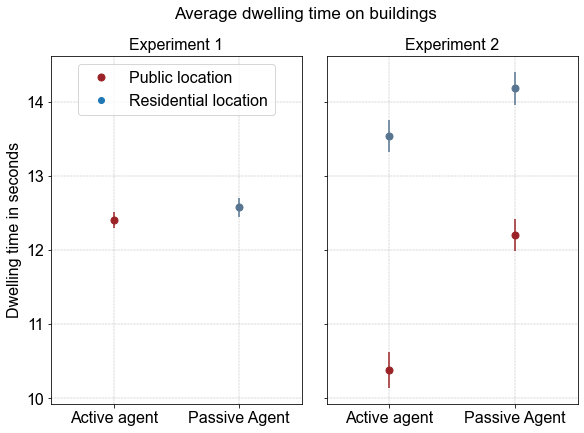

In [26]:
plt.style.use('default')
plt.rcParams["font.family"] = "Arial"

fig, axes = plt.subplots(1, 2, sharey=True,  figsize=(8, 6))
fig.suptitle('Average dwelling time on buildings \n', fontsize=17)
fig.tight_layout()



axes[0].errorbar( x=Public1["Agent_Category"],y=Public1["Dwelling_Time_Building_Gaze_mean"].values,
             yerr=Public1.Standard_error_building, fmt='o',  color='#9b2226', label= "Public location", markersize=7, capthick=20)
axes[0].errorbar( x=Residential1["Agent_Category"],y=Residential1["Dwelling_Time_Building_Gaze_mean"].values,
             yerr=Residential1.Standard_error_building, fmt='o',  color='#577590', label= "Residential location", markersize=7, capthick=20)
axes[0].set_ylabel("Dwelling time in seconds")
axes[0].set_title('Experiment 1', fontsize=16)
axes[0].legend(loc='upper center')
handles, labels = axes[0].get_legend_handles_labels()
line2d_obj = Line2D([0], [0],  marker='o',markeredgewidth=1, linewidth=0) #linewidth=1, linestyle='solid', alpha = 1.0
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
handles[-1] = line2d_obj
axes[0].legend(handles[0:],labels[-2:],loc="upper center", fontsize=16)


axes[1].errorbar(x=Public2["Agent_Category"],y=Public2["Dwelling_Time_Building_Gaze_mean"].values, 
             yerr=Public2.Standard_error_building, fmt='o', color= '#9b2226', label= "Public location", markersize=7, capthick=20)
axes[1].errorbar(x=Residential2["Agent_Category"],y=Residential2["Dwelling_Time_Building_Gaze_mean"].values, 
             yerr=Residential2.Standard_error_building, fmt='o', color= '#577590',  label= "Residential location", markersize=7, capthick=20)
axes[1].set_title('Experiment 2', fontsize=16)


for n, subplot in np.ndenumerate(axes):
    subplot.set_xlim((-0.5, 1.5))
    subplot.set_xticklabels(labels=["Active agent", "Passive Agent"])
    subplot.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
    subplot.tick_params(axis='both', labelsize=16)
    subplot.yaxis.get_label().set_fontsize(16)

    
plt.savefig("/Users/tracysanchezpacheco/Desktop/Dwelling_Building.png",  bbox_inches="tight",
            pad_inches=0.3, transparent=True)

<ipython-input-27-357824773252>:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_xticklabels(labels=["Public location", "Residential location"])


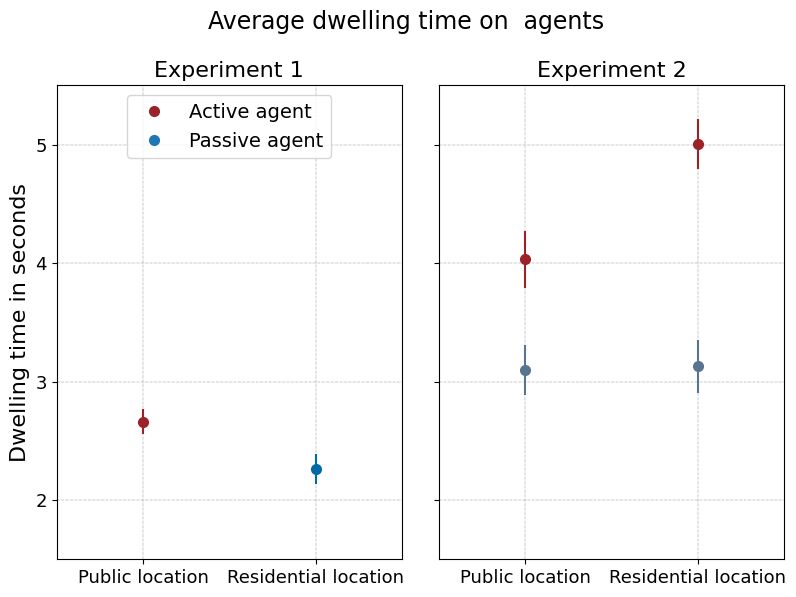

In [27]:
plt.style.use('default')
fig, axes = plt.subplots(1, 2, sharey=True,  figsize=(8, 6))
fig.suptitle('Average dwelling time on  agents \n', fontsize=17)
fig.tight_layout()



axes[0].errorbar(  x=Active1["Building_Category"],y=Active1["Dwelling_Time_Agent_Gaze_mean"],
             yerr=Active1.Standard_error_building, fmt='o',  color='#9b2226', label= "Active agent", markersize=7, capthick=20)
axes[0].errorbar( x=Passive1["Building_Category"],y=Passive1["Dwelling_Time_Agent_Gaze_mean"],
             yerr=Passive1.Standard_error_building, fmt='o--',  color='#006ba6', label= "Passive agent",markersize=7)
axes[0].set_ylabel("Dwelling time in seconds")
axes[0].set_title('Experiment 1', fontsize=16)
handles, labels = axes[0].get_legend_handles_labels()
line2d_obj = Line2D([0], [0],  marker='o',markeredgewidth=2, linewidth=0) #linewidth=1, linestyle='solid', alpha = 1.0
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
handles[-1] = line2d_obj
axes[0].legend(handles[0:],labels[-2:],loc="upper center", fontsize=14)



axes[1].errorbar(x=Active2["Building_Category"],y=Active2["Dwelling_Time_Agent_Gaze_mean"].values, 
             yerr=Active2.Standard_error_building, fmt='o', color= '#9b2226', label= "Active agent", markersize=7, capthick=20)
axes[1].errorbar(x=Passive2["Building_Category"],y=Passive2["Dwelling_Time_Agent_Gaze_mean"].values, 
             yerr=Passive2.Standard_error_building, fmt='o', color= '#577590',  label= "Passive agent", markersize=7, capthick=20)
axes[1].set_title('Experiment 2', fontsize=16)


for n, subplot in np.ndenumerate(axes):
    subplot.set_xlim((-0.5, 1.5))
    subplot.set_ylim((1.5, 5.5))
    subplot.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
    subplot.tick_params(axis='both', labelsize=13)
    subplot.set_xticklabels(labels=["Public location", "Residential location"])
    subplot.yaxis.get_label().set_fontsize(16)
    subplot.yaxis.set_major_locator(MaxNLocator(integer=True))
    


plt.savefig("/Users/tracysanchezpacheco/Desktop/Dwelling_Agent.png",  bbox_inches="tight",
            pad_inches=0.3, transparent=True)

In [28]:
Performance_Summary_Exp2 = pd.DataFrame(BehavioralData_Fixations_Wide_Exp2.groupby(["Agent_Category", "Building_Category"])["AbsolutError", "RT"].agg(['size','mean','median', 'std']))
Performance_Summary_Exp2.columns = ['_'.join(col) for col in Performance_Summary_Exp2.columns]
Performance_Summary_Exp2.reset_index(inplace=True)
Performance_Summary_Exp2.rename({"AbsolutError_size":"Size"}, inplace=True, axis=1)
Performance_Summary_Exp2["Standard_error_performance"] = (Performance_Summary_Exp2.AbsolutError_std)/np.sqrt(Performance_Summary_Exp2["Size"])

<ipython-input-28-7cdee0319844>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Performance_Summary_Exp2 = pd.DataFrame(BehavioralData_Fixations_Wide_Exp2.groupby(["Agent_Category", "Building_Category"])["AbsolutError", "RT"].agg(['size','mean','median', 'std']))


In [29]:
Performance_Summary_Exp2

,Agent_Category,Building_Category,Size,AbsolutError_mean,AbsolutError_median,AbsolutError_std,RT_size,RT_mean,RT_median,RT_std,Standard_error_performance
0,Active,Public,1591,45.625846,30.846345,43.061577,1591,9.120443,7.396342,6.278223,1.079580
1,Active,Residential,1482,45.849850,34.678865,41.893791,1482,8.973705,7.203692,6.332908,1.088242
2,Passive,Public,1656,48.439834,33.770660,45.649078,1656,9.250494,7.524088,6.389727,1.121765
3,Passive,Residential,1761,54.471034,39.891453,46.349093,1761,8.545156,6.608737,6.447019,1.104489


In [30]:
Performance_Summary_Agent= pd.DataFrame(AgentData_Fixations_Wide_Exp2.groupby([ "Building_Category", "Agent_Category"])["AbsolutError", "RT"].agg(['size','mean','median', 'std']))
Performance_Summary_Agent.columns = ['_'.join(col) for col in Performance_Summary_Agent.columns]
Performance_Summary_Agent.reset_index(inplace=True)
Performance_Summary_Agent.rename({"AbsolutError_size":"Size"}, inplace=True, axis=1)
Performance_Summary_Agent["Standard_error_performance"] = Performance_Summary_Agent.AbsolutError_std/np.sqrt(Performance_Summary_Agent["Size"])
Performance_Summary_Agent

<ipython-input-30-6fd595e589e6>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Performance_Summary_Agent= pd.DataFrame(AgentData_Fixations_Wide_Exp2.groupby([ "Building_Category", "Agent_Category"])["AbsolutError", "RT"].agg(['size','mean','median', 'std']))


,Building_Category,Agent_Category,Size,AbsolutError_mean,AbsolutError_median,AbsolutError_std,RT_size,RT_mean,RT_median,RT_std,Standard_error_performance
0,Public,Active,1127,54.976403,40.281433,46.599305,1127,8.553924,7.059555,5.874490,1.388090
1,Public,Passive,1333,60.877085,48.831203,47.525592,1333,6.907958,5.275460,5.424209,1.301705
2,Residential,Active,1146,53.616836,40.709463,45.863601,1146,8.622937,7.114568,5.844694,1.354802
3,Residential,Passive,1266,57.176877,45.591841,46.345001,1266,6.724609,5.120853,5.212293,1.302525


In [31]:
Performance_Summary_Exp1 = pd.DataFrame(BehavioralData_Fixations_Wide_Exp1.groupby(["Agent_Category", "Building_Category"])["AbsolutError", "RT"].agg(['size','mean','median', 'std']))
Performance_Summary_Exp1.columns = ['_'.join(col) for col in Performance_Summary_Exp1.columns]
Performance_Summary_Exp1.reset_index(inplace=True)
Performance_Summary_Exp1.rename({"AbsolutError_size":"Size"}, inplace=True, axis=1)
Performance_Summary_Exp1["Standard_error_performance"] = Performance_Summary_Exp1.AbsolutError_std/np.sqrt(Performance_Summary_Exp1["Size"])
#Performance_Summary_Exp1["Standard_error_RT"] = Performance_Summary_Exp1.RT_std/np.sqrt(Performance_Summary_Exp1["Size"])

<ipython-input-31-16cfb5df765f>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Performance_Summary_Exp1 = pd.DataFrame(BehavioralData_Fixations_Wide_Exp1.groupby(["Agent_Category", "Building_Category"])["AbsolutError", "RT"].agg(['size','mean','median', 'std']))


In [32]:
BehavioralData_Fixations_Wide_Exp1.Building_Category.value_counts()

Residential    5037
Public         5011
Name: Building_Category, dtype: int64

In [33]:
Exp1Passive = BehavioralData_Fixations_Wide_Exp1.loc[((BehavioralData_Fixations_Wide_Exp1.Agent_Category == "Passive") & (BehavioralData_Fixations_Wide_Exp1.Building_Category == "Residential")), "AbsolutError"]
Exp1Active = BehavioralData_Fixations_Wide_Exp1.loc[((BehavioralData_Fixations_Wide_Exp1.Agent_Category == "Active") & (BehavioralData_Fixations_Wide_Exp1.Building_Category == "Public")), "AbsolutError"]

In [34]:
len(Exp1Active)

5011

In [35]:
import scipy.stats as stats
confidence = 0.95
group1 = Exp1Passive
group2 = Exp1Active


mean1, sem1 = np.mean(group1), stats.sem(group1)
interval1 = stats.t.interval(confidence, len(group1) - 1, loc=mean1, scale=sem1)

mean2, sem2 = np.mean(group2), stats.sem(group2)
interval2 = stats.t.interval(confidence, len(group2) - 1, loc=mean2, scale=sem2)

In [36]:
display(interval1)
display(interval2)

(48.917995209904575, 51.37511456628239)

(45.91732885243089, 48.416860554550205)

In [37]:
display(Performance_Summary_Exp1)
display(Performance_Summary_Exp2)

,Agent_Category,Building_Category,Size,AbsolutError_mean,AbsolutError_median,AbsolutError_std,RT_size,RT_mean,RT_median,RT_std,Standard_error_performance
0,Active,Public,5011,47.167095,31.281232,45.127142,5011,8.113558,6.451460,5.604503,0.637493
1,Passive,Residential,5037,50.146555,37.653353,44.476413,5037,7.883778,6.173721,5.730181,0.626677


,Agent_Category,Building_Category,Size,AbsolutError_mean,AbsolutError_median,AbsolutError_std,RT_size,RT_mean,RT_median,RT_std,Standard_error_performance
0,Active,Public,1591,45.625846,30.846345,43.061577,1591,9.120443,7.396342,6.278223,1.079580
1,Active,Residential,1482,45.849850,34.678865,41.893791,1482,8.973705,7.203692,6.332908,1.088242
2,Passive,Public,1656,48.439834,33.770660,45.649078,1656,9.250494,7.524088,6.389727,1.121765
3,Passive,Residential,1761,54.471034,39.891453,46.349093,1761,8.545156,6.608737,6.447019,1.104489


In [38]:
Active1p = Performance_Summary_Exp1[Performance_Summary_Exp1.Agent_Category == "Active"]
Passive1p = Performance_Summary_Exp1[Performance_Summary_Exp1.Agent_Category == "Passive"]
Active2p = Performance_Summary_Exp2[Performance_Summary_Exp2.Agent_Category == "Active"]
Passive2p = Performance_Summary_Exp2[Performance_Summary_Exp2.Agent_Category == "Passive"]
Public1p = Performance_Summary_Exp1[Performance_Summary_Exp1.Building_Category == "Public"]
Residential1p = Performance_Summary_Exp1[Performance_Summary_Exp1.Building_Category == "Residential"]
Public2p = Performance_Summary_Exp2[Performance_Summary_Exp2.Building_Category == "Public"]
Residential2p = Performance_Summary_Exp2[Performance_Summary_Exp2.Building_Category == "Residential"]
Active2a = Performance_Summary_Agent[Performance_Summary_Agent.Agent_Category == "Active"]
Passive2a = Performance_Summary_Agent[Performance_Summary_Agent.Agent_Category == "Passive"]
Public2a = Performance_Summary_Agent[Performance_Summary_Agent.Building_Category == "Public"]
Residential2a = Performance_Summary_Agent[Performance_Summary_Agent.Building_Category == "Residential"]

In [39]:
Active2p

,Agent_Category,Building_Category,Size,AbsolutError_mean,AbsolutError_median,AbsolutError_std,RT_size,RT_mean,RT_median,RT_std,Standard_error_performance
0,Active,Public,1591,45.625846,30.846345,43.061577,1591,9.120443,7.396342,6.278223,1.079580
1,Active,Residential,1482,45.849850,34.678865,41.893791,1482,8.973705,7.203692,6.332908,1.088242


<ipython-input-40-ebf75baa3f5f>:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  subplot.set_xticklabels(labels=["Active agent", "Passive Agent"])


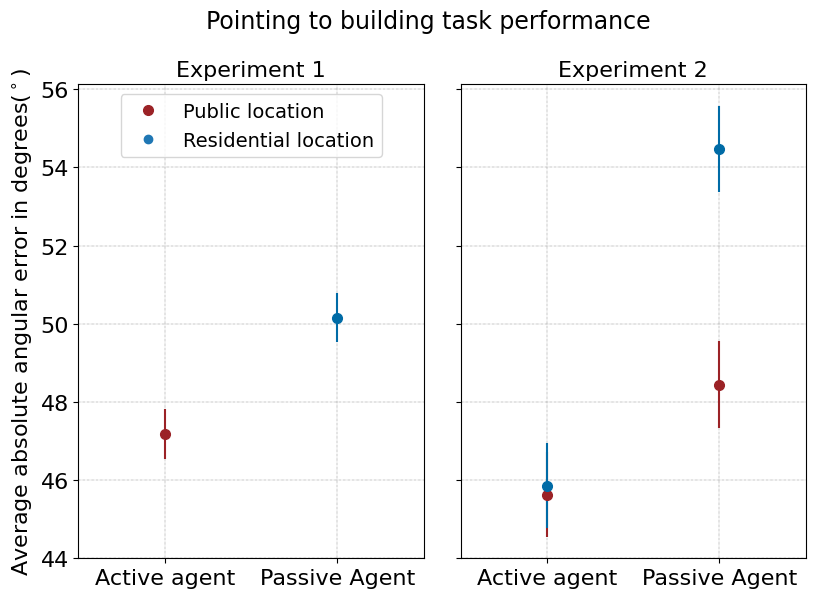

In [40]:
plt.style.use('default')
fig, axes = plt.subplots(1, 2, sharey=True,  figsize=(8, 6))
fig.suptitle('Pointing to building task performance \n', fontsize=17)
fig.tight_layout()


axes[0].errorbar( x=Public1p["Agent_Category"],y=Public1p["AbsolutError_mean"].values,
             yerr=Public1p.Standard_error_performance, fmt='o',  color='#9b2226', label= "Public location", markersize=7, capthick=20)
axes[0].errorbar( x=Residential1p["Agent_Category"],y=Residential1p["AbsolutError_mean"].values,
             yerr=(Residential1p.Standard_error_performance), fmt='o--',  color='#006ba6', label= "Residential location", markersize=7, capthick=20)
axes[0].legend( loc='upper center')
axes[0].set_title('Experiment 1', fontsize=16)
axes[0].set_ylabel("Average absolute angular error in degrees($^\circ$)")
handles, labels = axes[0].get_legend_handles_labels()
line2d_obj = Line2D([0], [0],  marker='o',markeredgewidth=1, linewidth=0) 
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
handles[-1] = line2d_obj
axes[0].legend(handles[0:],labels[-2:],loc="upper center", fontsize=14)


axes[1].errorbar(x=Public2p["Agent_Category"],y=Public2p["AbsolutError_mean"].values, 
             yerr=Public2p.Standard_error_performance, fmt='o', color= '#9b2226', label= "Public location", markersize=7, capthick=20)
axes[1].errorbar(x=Residential2p["Agent_Category"],y=Residential2p["AbsolutError_mean"].values, 
             yerr=Residential2p.Standard_error_performance, fmt='o', color= '#006ba6',  label= "Residential location", markersize=7, capthick=20)
axes[1].set_title('Experiment 2', fontsize=16)



for n, subplot in np.ndenumerate(axes):
    subplot.set_xlim((-0.5, 1.5))
    subplot.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
    subplot.tick_params(axis='both', labelsize=16)
    subplot.set_xticklabels(labels=["Active agent", "Passive Agent"])
    subplot.yaxis.get_label().set_fontsize(16)
    subplot.yaxis.set_major_locator(MaxNLocator(integer=True))
plt.savefig("/Users/tracysanchezpacheco/Desktop/Absolut_Error_OneStandard.png",  bbox_inches="tight",
            pad_inches=0.3, transparent=True)

<ipython-input-41-3bbed7aa6020>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels(labels=["Public location", "Residential location"])


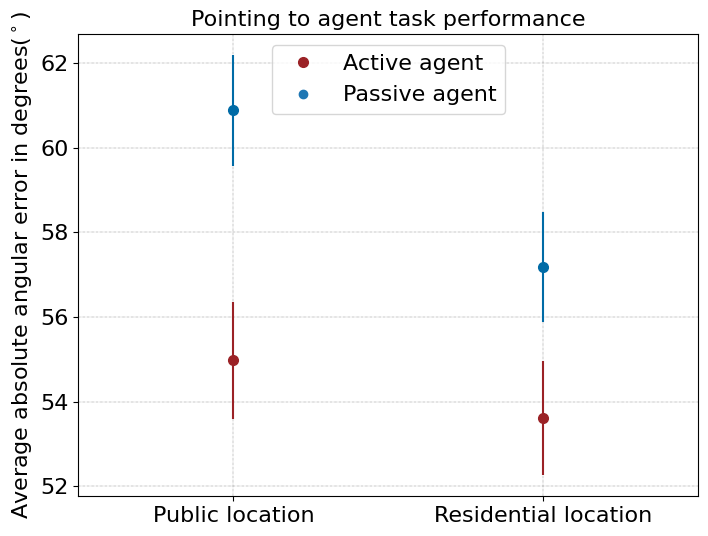

In [41]:
fig, axes = plt.subplots(1, 1, sharey=True,  figsize=(8, 6))
plt.errorbar(x=Active2a["Building_Category"],y=Active2a["AbsolutError_mean"].values, 
             yerr=Active2a.Standard_error_performance, fmt='o', color= '#9b2226', label= "Active agent", markersize=7, capthick=20)
plt.errorbar(x=Passive2a["Building_Category"],y=Passive2a["AbsolutError_mean"].values, 
             yerr=Passive2a.Standard_error_performance, fmt='o', color= '#006ba6',  label= "Passive agent", markersize=7, capthick=20)
plt.title('Pointing to agent task performance', fontsize=16)
handles, labels = axes.get_legend_handles_labels()
line2d_obj = Line2D([0], [0],  marker='o',markeredgewidth=1, linewidth=0) 
handles = [h[0] if isinstance(h, container.ErrorbarContainer) else h for h in handles]
handles[-1] = line2d_obj
axes.legend(handles[0:],labels[-2:],loc="upper center", fontsize=16)
axes.tick_params(axis='both', labelsize=16)
axes.set_ylabel("Average absolute angular error in degrees($^\circ$)")
axes.yaxis.get_label().set_fontsize(16)
axes.set_xticklabels(labels=["Public location", "Residential location"])
plt.xlim((-0.5, 1.5))
plt.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
plt.savefig("/Users/tracysanchezpacheco/Desktop/Absolut_Error_OneStandard_Agent.png",  bbox_inches="tight",
            pad_inches=0.3, transparent=True)

In [42]:
Complete_model = pd.read_csv( "/Volumes/TwoTeras/Resources/Complete_model.csv")
Complete_model['term'] = ["Intercept", "Dwealling time on task Building",  "Dwealling time on agent","Location  (Public vs. Residential)","Agent category (Active vs. Passive)","Agent Presence in Task Stimuli", "Congruent Pair", "Location x Agent category"]
Complete_model.rename({'term': 'Factor',"Std. Error": "Standard_Error"}, axis=1, inplace=True)
Complete_model["Significance"] = np.where(Complete_model["Pr(>|t|)"] < 0.001, "***", " ")
Complete_model["Anotate"] = Complete_model["Estimate"].round(2).astype(str)  + Complete_model["Significance"]

In [43]:
Complete_model.columns

Index(['Unnamed: 0', 'Factor', 'Estimate', 'Standard_Error', 'df', 't value',
       'Pr(>|t|)', 'Significance', 'Anotate'],
      dtype='object')

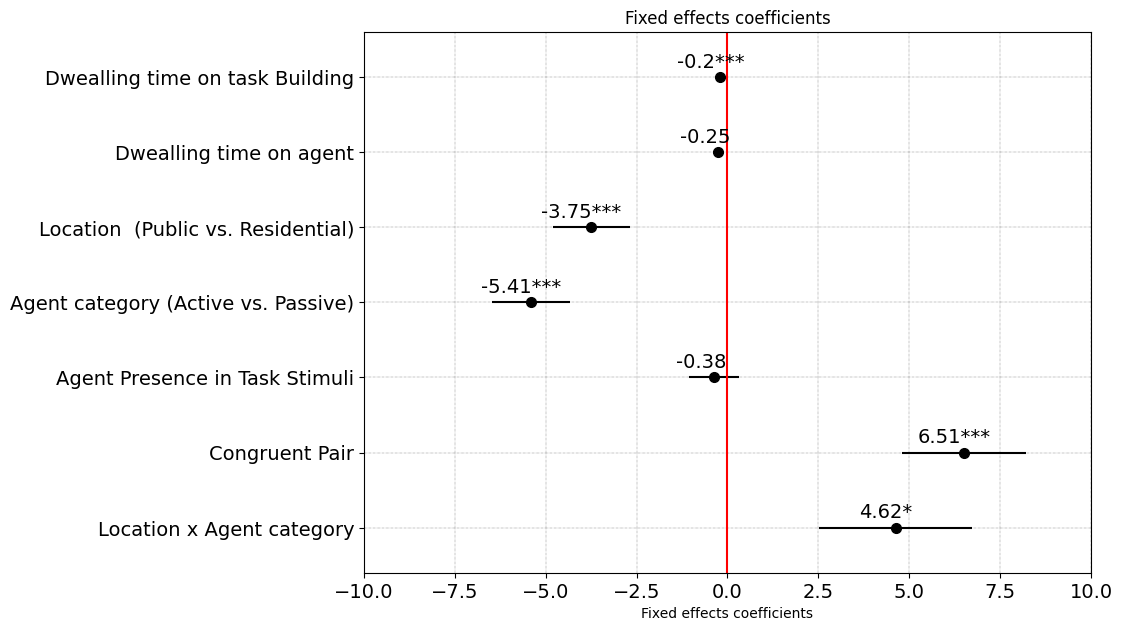

In [44]:
fig, axes = plt.subplots(1, 1,sharey=True,  figsize=(8, 6))
fig.tight_layout()

# Sample data (replace this with your actual data)
Complete_modelf = Complete_model.iloc[1:].copy()
Complete_modelf.sort_values('Unnamed: 0',  ascending=False, inplace=True)
Complete_modelf["Significance"] = np.where(Complete_modelf["Pr(>|t|)"] < 0.001, "***", np.where(Complete_modelf["Pr(>|t|)"] < 0.05, "*", " "))
Complete_modelf["Anotate"] = Complete_modelf["Estimate"].round(2).astype(str) + Complete_modelf["Significance"]

# Create the error bar plot
plt.errorbar(x=Complete_modelf["Estimate"], y=Complete_modelf["Factor"],
                  xerr=Complete_modelf["Standard_Error"], fmt='o', color='black', markersize=7, capthick=20)

# Annotate each point with the "Anotate" values
for xi, yi, annotation in zip(Complete_modelf["Estimate"], Complete_modelf["Factor"], Complete_modelf["Anotate"]):
    plt.annotate(annotation, (xi, yi), textcoords="offset points", xytext=(-7, 7), ha='center', fontsize=14)

# Adding grid lines and vertical red line at x=0
plt.grid(True, color="grey", linewidth=0.3, linestyle="-.")
plt.axvline(x=0, color='r')

# Set labels and title
plt.xlabel(r"Fixed effects coefficients")
plt.title(r'Fixed effects coefficients')
plt.xlim((-10, 10))
axes.tick_params(axis='both', labelsize=14)
axes.margins(0.1)

plt.savefig("/Users/tracysanchezpacheco/Desktop/Model_Estimates.png",  bbox_inches="tight",
            pad_inches=0.3)

In [45]:
# Two experiments: Just location distintion 
Performance_Building = pd.DataFrame(Complete_Experiments.groupby("Building_Category")['AbsolutError'].agg(['size','mean','median', 'std']))
Performance_Building.reset_index(inplace=True)
Performance_Building["Standard_error_performance"] = (Performance_Building['std'])/np.sqrt(Performance_Building["size"])
#Two experiments: Just agent distintion
Performance_Agent = pd.DataFrame(Complete_Experiments.groupby("Agent_Category")['AbsolutError'].agg(['size','mean','median', 'std']))
Performance_Agent.reset_index(inplace=True)
Performance_Agent["Standard_error_performance"] = (Performance_Agent['std'])/np.sqrt(Performance_Agent["size"])
#Two experiments: Interaction
Performance_Interaction = pd.DataFrame(Complete_Experiments.groupby(["Building_Category","Agent_Category"])['AbsolutError'].agg(['size','mean','median', 'std']))
Performance_Interaction.reset_index(inplace=True)
Performance_Interaction["Standard_error_performance"] = (Performance_Interaction['std'])/np.sqrt(Performance_Interaction["size"])


<ipython-input-46-e567fc95e480>:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels=["Public", "Residential"], multialignment= "right")


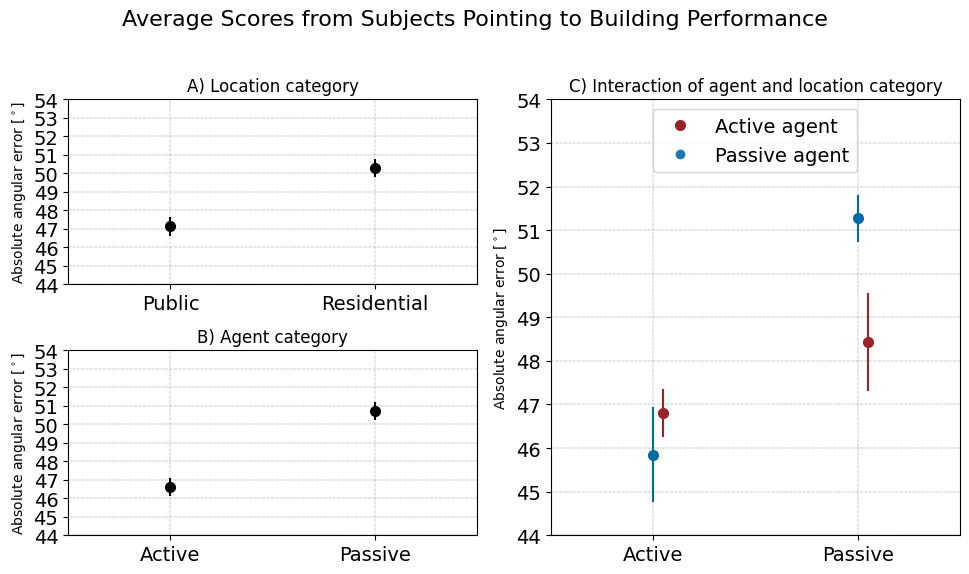

<Figure size 640x480 with 0 Axes>

In [46]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
# Create a new figure
fig = plt.figure(figsize=(10, 6))
fig.tight_layout()
# Define the grid structure. 2 rows by 2 columns. 
# The second column (the one on the right) will span 2 rows.
gs = gridspec.GridSpec(2, 2, width_ratios=[1, 1])

# Add the first plot to the top-left
ax0 = fig.add_subplot(gs[0])
ax0.errorbar(x=Performance_Building.iloc[0][0],y=Performance_Building.iloc[0][2], 
             yerr=Performance_Building.iloc[0][5], fmt='o', color= '#000000', label= "Public", markersize=7, capthick=20)
ax0.errorbar(x=1,y=Performance_Building.iloc[1][2], 
             yerr=Performance_Building.iloc[1][5], fmt='o', color= '#000000', label= "Residential", markersize=7, capthick=20)
ax0.set_xticklabels(labels=["Public", "Residential"], multialignment= "right")
ax0.set_title('A) Location category')

# Add the second plot to the bottom-left
ax1 = fig.add_subplot(gs[2])
ax1.errorbar(x=Performance_Agent.iloc[0][0],y=Performance_Agent.iloc[0][2], 
             yerr=Performance_Agent.iloc[0][5], fmt='o', color= '#000000', label= "Active", markersize=7, capthick=20)
ax1.errorbar(x=Performance_Agent.iloc[1][0],y=Performance_Agent.iloc[1][2], 
             yerr=Performance_Agent.iloc[1][5], fmt='o', color= '#000000', label= "Passive", markersize=7, capthick=20)

ax1.set_title('B) Agent category')

# Add the third plot, which spans two rows on the right
ax2 = fig.add_subplot(gs[:,1])  # this makes it span two rows
ax2.errorbar(x=0 + 0.05,y=Performance_Interaction.iloc[0][3], 
             yerr=Performance_Interaction.iloc[0][6], fmt='o', color= '#9b2226', label= "Public", markersize=7, capthick=20)
ax2.errorbar(x=Performance_Interaction.iloc[2][1],y=Performance_Interaction.iloc[2][3], 
             yerr=Performance_Interaction.iloc[2][6], fmt='o', color= '#006ba6', label= "Passive", markersize=7, capthick=20)
ax2.errorbar(x=1 + 0.05,y=Performance_Interaction.iloc[1][3], 
             yerr=Performance_Interaction.iloc[1][6], fmt='o', color= '#9b2226', label= "Public", markersize=7, capthick=20)
ax2.errorbar(x=Performance_Interaction.iloc[3][1],y=Performance_Interaction.iloc[3][3], 
             yerr=Performance_Interaction.iloc[3][6], fmt='o', color= '#006ba6', label= "Passive", markersize=7, capthick=20)
ax2.legend(handles[0:],labels[-2:],loc="upper center", fontsize=14)
ax2.set_title('C) Interaction of agent and location category')

for n, subplot in np.ndenumerate([ax0,ax1,ax2]):
    subplot.set_xlim((-0.5, 1.5))
    subplot.set_ylim((44,54))
    subplot.set_ylabel("Absolute angular error [$^\circ$]")
    subplot.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1]))
    subplot.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
    subplot.tick_params(axis='both', labelsize=14)
    #subplot.yaxis.get_label().set_fontsize(14)
    subplot.yaxis.set_major_locator(MaxNLocator(integer=True))
fig.suptitle('Average Scores from Subjects Pointing to Building Performance', fontsize=16)
plt.tight_layout(rect=[0.02, 0.03, 1, 0.95])
plt.show()
plt.savefig("/Users/tracysanchezpacheco/Desktop/Two_Experiments_Three_plots.png",  bbox_inches="tight",
            pad_inches=0.3, transparent=True)

<ipython-input-47-cf095cd7824b>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax0.set_xticklabels(labels=["Public", "Residential"], multialignment= "right")


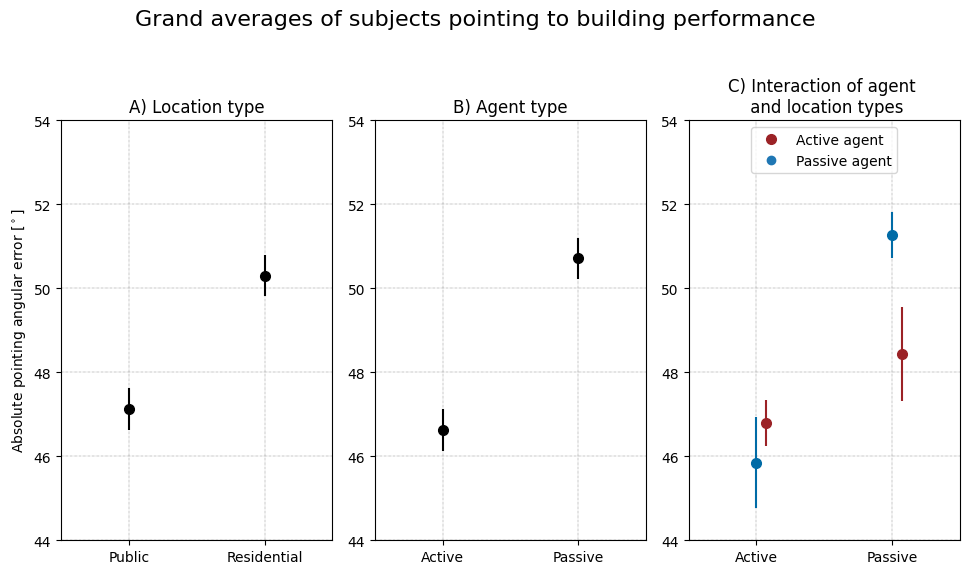

<Figure size 640x480 with 0 Axes>

In [47]:
# Create a new figure
fig = plt.figure(figsize=(10, 6))
# Define the grid structure. 2 rows by 2 columns. 
# The second column (the one on the right) will span 2 rows.
gs = gridspec.GridSpec(1, 3)

# Add the first plot to the top-left
ax0 = fig.add_subplot(gs[0,0])
ax0.errorbar(x=Performance_Building.iloc[0][0],y=Performance_Building.iloc[0][2], 
             yerr=Performance_Building.iloc[0][5], fmt='o', color= '#000000', label= "Public", markersize=7, capthick=20)
ax0.errorbar(x=1,y=Performance_Building.iloc[1][2], 
             yerr=Performance_Building.iloc[1][5], fmt='o', color= '#000000', label= "Residential", markersize=7, capthick=20)
ax0.set_xticklabels(labels=["Public", "Residential"], multialignment= "right")
ax0.set_title('A) Location type')
ax0.set_ylim((44,54))
ax0.set_ylabel("Absolute pointing angular error [$^\circ$]")

# Add the second plot to the bottom-left
ax1 = fig.add_subplot(gs[0,1], sharey=ax0)
ax1.errorbar(x=Performance_Agent.iloc[0][0],y=Performance_Agent.iloc[0][2], 
             yerr=Performance_Agent.iloc[0][5], fmt='o', color= '#000000', label= "Active", markersize=7, capthick=20)
ax1.errorbar(x=Performance_Agent.iloc[1][0],y=Performance_Agent.iloc[1][2], 
             yerr=Performance_Agent.iloc[1][5], fmt='o', color= '#000000', label= "Passive", markersize=7, capthick=20)
#ax1.set_yticklabels([])
ax1.set_title('B) Agent type')

# Add the third plot, which spans two rows on the right
ax2 = fig.add_subplot(gs[0,2], sharey=ax0)  # this makes it span two rows
ax2.errorbar(x=0 + 0.07,y=Performance_Interaction.iloc[0][3], 
             yerr=Performance_Interaction.iloc[0][6], fmt='o', color= '#9b2226', label= "Public", markersize=7, capthick=20)
ax2.errorbar(x=Performance_Interaction.iloc[2][1],y=Performance_Interaction.iloc[2][3], 
             yerr=Performance_Interaction.iloc[2][6], fmt='o', color= '#006ba6', label= "Passive", markersize=7, capthick=20)
ax2.errorbar(x=1 + 0.07,y=Performance_Interaction.iloc[1][3], 
             yerr=Performance_Interaction.iloc[1][6], fmt='o', color= '#9b2226', label= "Public", markersize=7, capthick=20)
ax2.errorbar(x=Performance_Interaction.iloc[3][1],y=Performance_Interaction.iloc[3][3], 
             yerr=Performance_Interaction.iloc[3][6], fmt='o', color= '#006ba6', label= "Passive", markersize=7, capthick=20)
#ax2.set_yticklabels([])
ax2.legend(handles[0:],labels[-2:],loc="upper center", fontsize=10)

ax2.set_title('C) Interaction of agent \n and location types')

for n, subplot in np.ndenumerate([ax0,ax1,ax2]):
    subplot.set_xlim((-0.5, 1.5))
    subplot.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1]))
    subplot.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
    subplot.tick_params(axis='both', labelsize=10)
fig.suptitle('Grand averages of subjects pointing to building performance', fontsize=16)
plt.tight_layout(rect=[0.02, 0.03, 1, 0.95])
plt.show()
plt.savefig("/Users/tracysanchezpacheco/Desktop/Two_Experiments_Three_plots.png",  bbox_inches="tight",
            pad_inches=0.3, transparent=True)

In [48]:
SecondExp = pd.DataFrame(ConcatSecondExperiment.groupby('Task')["AbsolutError"].agg(['size','mean','median', 'std'])).reset_index()
SecondExp["Standard_error_performance"] = (SecondExp['std'])/np.sqrt(SecondExp["size"])
SecondExp.insert(1,'Add' , 'Add')

In [49]:
SecondExp_Inter_Agent = pd.DataFrame(ConcatSecondExperiment.groupby(['Task', 'Agent_Category'])["AbsolutError"].agg(['size','mean','median', 'std'])).reset_index()
SecondExp_Inter_Building = pd.DataFrame(ConcatSecondExperiment.groupby(['Task', 'Building_Category'])["AbsolutError"].agg(['size','mean','median', 'std'])).reset_index()
SecondExp_Inter_Agent["Standard_error_performance"] = (SecondExp_Inter_Agent['std'])/np.sqrt(SecondExp_Inter_Agent["size"])
SecondExp_Inter_Building["Standard_error_performance"] = (SecondExp_Inter_Agent['std'])/np.sqrt(SecondExp_Inter_Agent["size"])

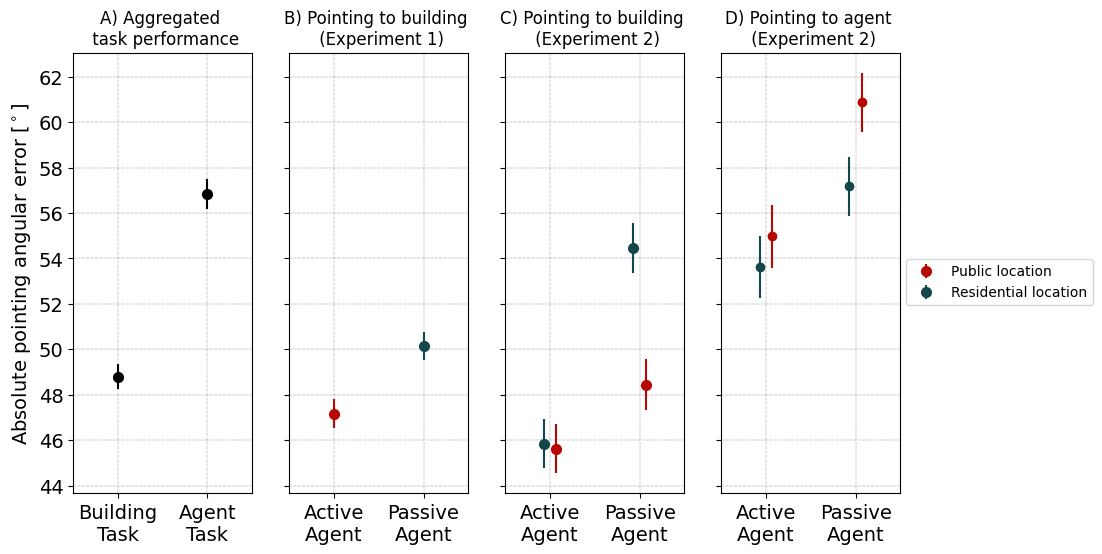

In [200]:
plt.style.use('default')
fig, axes = plt.subplots(1, 4, sharey=True,  figsize=(9, 5))
#fig.suptitle('Pointing task performance \n', fontsize=18)
fig.tight_layout()

#Building Vs Agent

axes[0].errorbar(x= SecondExp.iloc[1,0], y= SecondExp.iloc[1,3],yerr= SecondExp.iloc[1,6], color='#000000', markersize=7, capthick=20, fmt='o')
axes[0].errorbar(x= SecondExp.iloc[0,0], y= SecondExp.iloc[0,3],yerr= SecondExp.iloc[0,6], color='#000000', markersize=7, capthick=20, fmt='o')
axes[0].set_title('A) Aggregated \n task performance')
axes[0].set_ylabel("Absolute pointing angular error [$^\circ$]")


#Experiment 1
axes[1].errorbar( x=Public1p["Agent_Category"],y=Public1p["AbsolutError_mean"].values,
             yerr=Public1p.Standard_error_performance, fmt='o',  color='#B80600', label= "Public location", markersize=7, capthick=20)
axes[1].errorbar( x=Residential1p["Agent_Category"],y=Residential1p["AbsolutError_mean"].values,
             yerr=(Residential1p.Standard_error_performance), fmt='o--',  color='#144749', label= "Residential location", markersize=7, capthick=20)
axes[1].set_title('B) Pointing to building \n (Experiment 1)')


# Experiment 2 
x_positioner_p = np.arange(len(Public2p["Building_Category"]))
x_positioner_r = np.arange(len(Residential2p["Agent_Category"]))
offset = 0.07
          
axes[2].errorbar(x=x_positioner_p + offset,y=Public2p["AbsolutError_mean"].values, 
             yerr=Public2p.Standard_error_performance, fmt='o', color= '#B80600', label= "Public location", markersize=7, capthick=20)
axes[2].errorbar(x=x_positioner_r - offset,y=Residential2p["AbsolutError_mean"].values, 
             yerr=Residential2p.Standard_error_performance, fmt='o', color= '#144749',  label= "Residential location", markersize=7, capthick=20)
axes[2].set_title('C) Pointing to building \n (Experiment 2)')

# Pointing to agent

axes[3].errorbar(x=x_positioner_p + offset,y=Public2a["AbsolutError_mean"].values, 
             yerr=Public2a.Standard_error_performance, fmt='o', color= '#B80600', label= "Public location")
axes[3].errorbar(x=x_positioner_r - offset,y=Residential2a["AbsolutError_mean"].values, 
             yerr=Residential2a.Standard_error_performance, fmt='o', color= '#144749',  label= "Residential location")
axes[3].set_title('D) Pointing to agent \n (Experiment 2)')
axes[3].set_xlim((-0.5, 1.5))
for n, subplot in np.ndenumerate(axes):
    subplot.set_xlim((-0.5, 1.5))
    subplot.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1]))
    subplot.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
    subplot.tick_params(axis='both', labelsize=14)
    subplot.set_xticklabels(labels=["Active\nAgent", "Passive\nAgent"], multialignment= "center")
    subplot.yaxis.get_label().set_fontsize(14)
    subplot.yaxis.set_major_locator(MaxNLocator(integer=True))
axes[0].set_xticklabels(labels=["Building\nTask", "Agent\nTask"], multialignment= "center")
handles, labels = axes[2].get_legend_handles_labels()
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(0.97, 0.5))
plt.savefig("/Users/tracysanchezpacheco/Desktop/Absolut_Error_OneStandard_3plots.png",  bbox_inches="tight",
            pad_inches=0.3, transparent=True)

In [51]:
SecondExp_Inter_Building.head()

,Task,Building_Category,size,mean,median,std,Standard_error_performance
0,Agent,Public,2460,58.173805,45.343942,47.185662,0.969559
1,Agent,Residential,2412,55.485415,43.417974,46.141624,0.921563
2,Building,Public,3247,47.061006,32.188579,44.415537,0.766590
3,Building,Residential,3243,50.531288,37.205855,44.569364,0.788693


In [52]:
SecondExp_Inter_Building.head()

,Task,Building_Category,size,mean,median,std,Standard_error_performance
0,Agent,Public,2460,58.173805,45.343942,47.185662,0.969559
1,Agent,Residential,2412,55.485415,43.417974,46.141624,0.921563
2,Building,Public,3247,47.061006,32.188579,44.415537,0.766590
3,Building,Residential,3243,50.531288,37.205855,44.569364,0.788693


In [53]:
SecondExp_Inter_Agent.head()

,Task,Agent_Category,size,mean,median,std,Standard_error_performance
0,Agent,Active,2273,54.290937,40.489016,46.224665,0.969559
1,Agent,Passive,2599,59.074675,47.531289,46.981628,0.921563
2,Building,Active,3073,45.733875,32.787709,42.495643,0.766590
3,Building,Passive,3417,51.548100,36.825687,46.103108,0.788693


In [54]:
SecondExp_Inter_Agent.iloc[2,3]

45.7338753485493

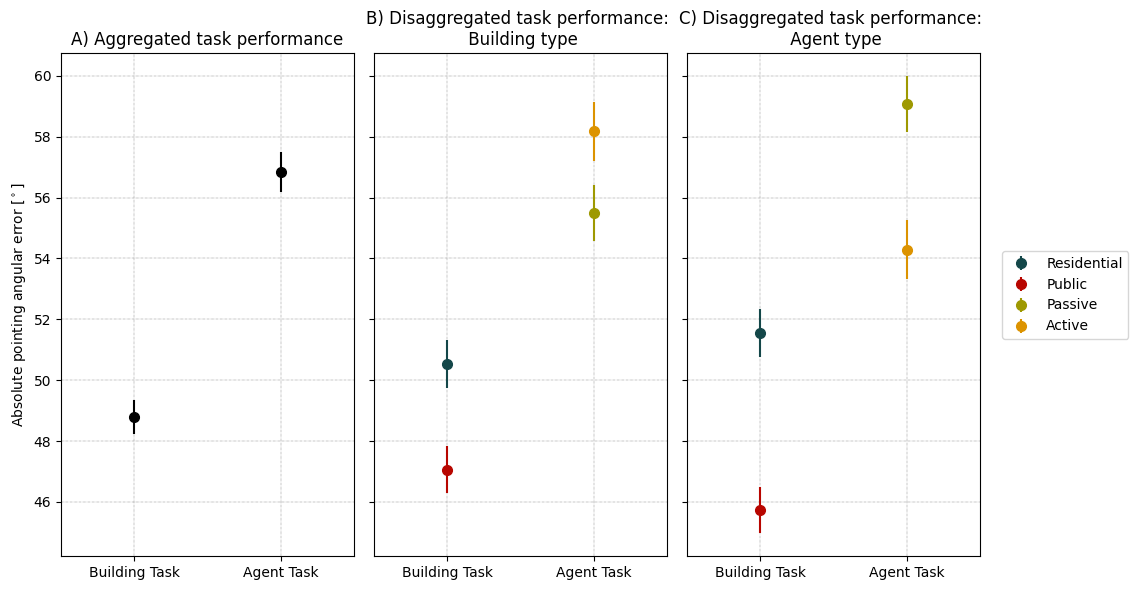

In [218]:
def plot_errorbar(ax, data, x_col, y_col, yerr_col, color, label=None, **kwargs):
    ax.errorbar(x=data[x_col] + ' Task', y=data[y_col], 
                yerr=data[yerr_col], color=color, label=label, **kwargs)

# Create a new figure
fig, axes = plt.subplots(1, 3, figsize=(10, 6), sharey=True)

# First plot
plot_errorbar(axes[0], SecondExp.iloc[1], 0, 3, 6, '#000000', markersize=7, capthick=20, fmt='o')
plot_errorbar(axes[0], SecondExp.iloc[0], 0, 3, 6, '#000000', markersize=7, capthick=20, fmt='o')
axes[0].set_title('A) Aggregated task performance')
axes[0].set_ylabel("Absolute pointing angular error [$^\circ$]")


# Second plot
colors = ['#DC9300', '#9E9901', '#B80600', '#144749',]
for i in  range(3, -1, -1):
    plot_errorbar(axes[1], SecondExp_Inter_Building.iloc[i], 0, 3, 6, colors[i], label=SecondExp_Inter_Building.iloc[i, 1], markersize=7, capthick=20, fmt='o')

handles, labels = axes[1].get_legend_handles_labels()
axes[1].set_title('B) Disaggregated task performance: \n Building type')

# Third plot
for i in range(3, -1, -1):
    plot_errorbar(axes[2], SecondExp_Inter_Agent.iloc[i], 0, 3, 6, colors[i], label=SecondExp_Inter_Agent.iloc[i, 1], markersize=7, capthick=20, fmt='o')

axes[2].set_title('C) Disaggregated task performance: \n Agent type')

# Shared settings
for ax in axes:
    ax.set_xlim((-0.5, 1.5))
    ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0,1]))
    ax.grid(True, color = "grey", linewidth = "0.3", linestyle = "-.")
    ax.tick_params(axis='both', labelsize=10)
    ax.set_xticklabels(labels=["Building Task", "Agent Task"], multialignment= "right")

handles, labels = axes[2].get_legend_handles_labels()
labels=["Residential", "Public", "Passive", "Active"]
fig.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.savefig("/Users/tracysanchezpacheco/Desktop/Pointing_BuildingVsAgent.png", bbox_inches="tight", pad_inches=0.3, transparent=True)

In [56]:
SecondExp_Inter_Agent

,Task,Agent_Category,size,mean,median,std,Standard_error_performance
0,Agent,Active,2273,54.290937,40.489016,46.224665,0.969559
1,Agent,Passive,2599,59.074675,47.531289,46.981628,0.921563
2,Building,Active,3073,45.733875,32.787709,42.495643,0.766590
3,Building,Passive,3417,51.548100,36.825687,46.103108,0.788693


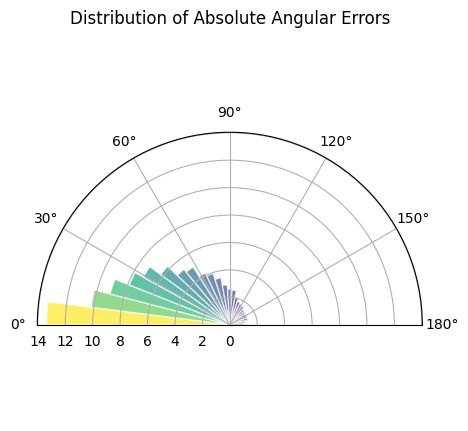

(0.0, 7.2]        13.369125
(7.2, 14.4]       10.191868
(14.4, 21.6]       9.012498
(21.6, 28.8]       7.885936
(28.8, 36.0]       7.208238
(36.0, 43.2]       6.222496
(43.2, 50.4]       5.245555
(50.4, 57.6]       4.990319
(57.6, 64.8]       4.171801
(64.8, 72.0]       3.934167
(72.0, 79.2]       3.485302
(79.2, 86.4]       2.913220
(86.4, 93.6]       2.596374
(93.6, 100.8]      2.525964
(100.8, 108.0]     2.050695
(108.0, 115.2]     1.795459
(115.2, 122.4]     1.619433
(122.4, 129.6]     1.681042
(129.6, 136.8]     1.469812
(136.8, 144.0]     1.355395
(144.0, 151.2]     1.399402
(151.2, 158.4]     1.372998
(158.4, 165.6]     1.372998
(165.6, 172.8]     1.144165
(172.8, 180.0]     0.985742
Name: bins, dtype: float64


In [58]:
# Assuming you have 'AbsolutError' column in your DataFrame
# ConcatSecondExperiment['AbsolutError'] = ...

def scotts_rule(data):
    std_dev = np.std(data)
    n = len(data)
    bin_width = 3.5 * std_dev * (n ** (-1/3))
    n_bins = int(np.ptp(data) / bin_width)
    return n_bins

# Get the number of bins based on Scott's rule
n_bins_scott = scotts_rule(ConcatSecondExperiment['AbsolutError'])

# Create bins based on the number of bins determined by the rule
bin_edges = np.linspace(0, 180, n_bins_scott+1)

# Categorize the data into these bins
ConcatSecondExperiment['bins'] = pd.cut(ConcatSecondExperiment['AbsolutError'], bins=bin_edges)

# Calculate bin counts and normalize
bin_counts = ConcatSecondExperiment['bins'].value_counts()
normalized_bin_counts = (bin_counts / len(ConcatSecondExperiment)) * 100

# Convert bin labels back to radians for plotting
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
bin_centers_radians = np.deg2rad(bin_centers)

# Create a half polar plot
plt.figure(figsize=(10, 5))
ax = plt.subplot(111, projection='polar')

# Limit the display to half a circle
ax.set_thetamin(0)
ax.set_thetamax(180)

# Get colormap
colors = cm.viridis(normalized_bin_counts / normalized_bin_counts.max())

# Plot data as bars
bars = ax.bar(bin_centers_radians, normalized_bin_counts, width=np.deg2rad(180/n_bins_scott), edgecolor='white', color=colors, alpha=0.7)

# Set the direction of azimuthal labels
ax.set_theta_zero_location("W")
ax.set_theta_direction(-1)

# Set grid and title
ax.set_title("Distribution of Absolute Angular Errors", va='bottom')
plt.show()

# Print out the percentage of data points in each bin for verification
print(normalized_bin_counts.sort_index())


In [59]:
ConcatSecondExperiment['SignedAngle-+180'].describe()

count    11362.000000
mean        -5.906347
std         69.119959
min       -179.971653
25%        -45.462373
50%         -4.658817
75%         31.777086
max        179.801385
Name: SignedAngle-+180, dtype: float64

In [219]:
Complete_Experiments.head()

,Unnamed: 0,Unnamed: 0.1,SubjectID,AbsolutError,SignedAngle-+180,IQR,RT,DistanceToParticipant,PointingTaskStartingLocations,TrialNumber,...,meaningfulBuilding,ImageName,Dwelling_Time_Building_Gaze,Fixation_Count_Building_Gaze,Dwelling_Time_Agent_Gaze,Fixation_Count_Agent_Gaze,Agent_Action_level,Agent_Category,Building_Category,Task
0,0,0,365,15.396716,15.396716,63.921884,25.825715,197.768723,21,1,...,Not meaningful,46_Sa,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,NaN
1,1,1,365,6.037733,-6.037733,63.921884,4.799789,213.475525,16,78,...,Not meaningful,46_SaNo,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,NaN
2,2,2,365,6.345290,6.345290,63.921884,4.638590,111.623512,13,88,...,Not meaningful,46_Sa,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,NaN
3,3,3,365,3.627752,3.627752,63.921884,2.361455,111.623512,13,95,...,Not meaningful,46_SaNo,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,NaN
4,4,4,365,19.115237,-19.115237,63.921884,5.975304,232.765823,8,131,...,Not meaningful,46_SaNo,37.230251,186.0,3.428844,12.0,Passive,Passive,Residential,NaN


In [60]:
SecondExp.iloc[0][5]

46.68627359288108

In [61]:
Performance_Building.iloc[1][4]

44.51054710864119

In [62]:
Performance_Building.iloc[1][0]

'Residential'

In [63]:
Complete_Experiments.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'SubjectID', 'AbsolutError',
       'SignedAngle-+180', 'IQR', 'RT', 'DistanceToParticipant',
       'PointingTaskStartingLocations', 'TrialNumber', 'StartPointID',
       'ID_for_StartingPosition', 'avatar_ID', 'AvatarPresenceCategory',
       'Context', 'meaningfulBuilding', 'ImageName',
       'Dwelling_Time_Building_Gaze', 'Fixation_Count_Building_Gaze',
       'Dwelling_Time_Agent_Gaze', 'Fixation_Count_Agent_Gaze',
       'Agent_Action_level', 'Agent_Category', 'Building_Category', 'Task'],
      dtype='object')

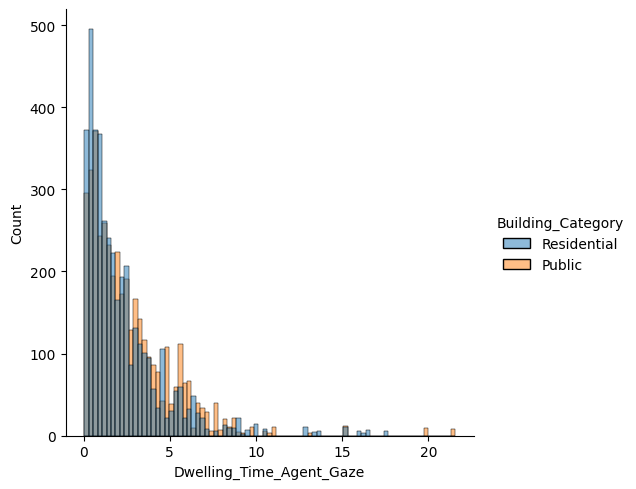

In [65]:
sns.displot(data=BehavioralData_Fixations_Wide_Exp1, x="Dwelling_Time_Agent_Gaze", hue="Building_Category")

<Figure size 640x480 with 0 Axes>

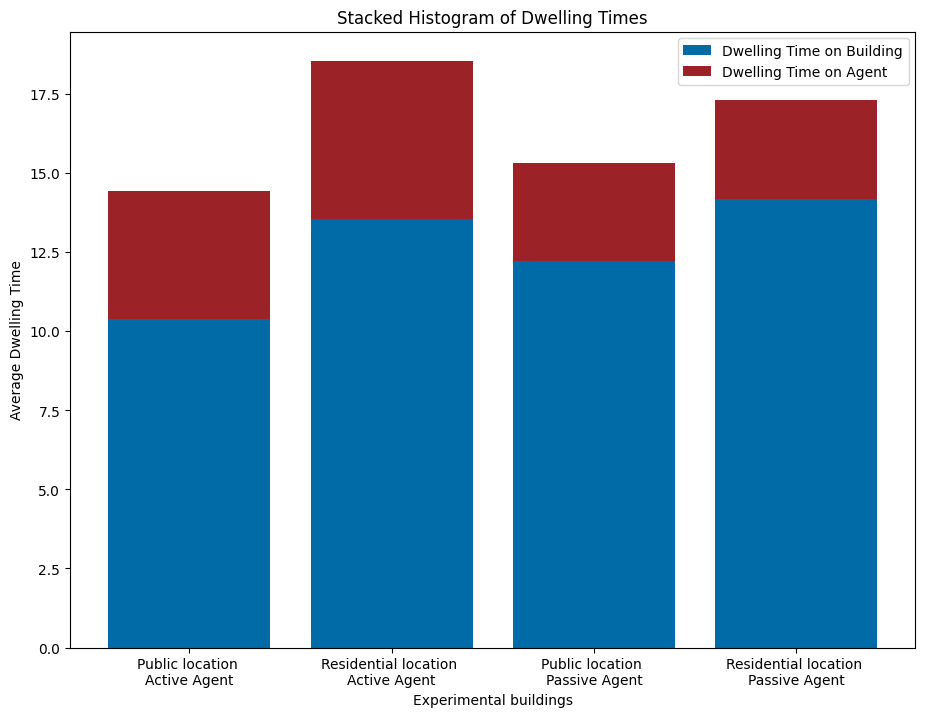

In [66]:

grouped = BehavioralData_Fixations_Wide_Exp2.groupby(["Agent_Category", "Building_Category"]).mean().reset_index()
grouped["Building_Agent"] = grouped["Building_Category"] + " location \n" + grouped["Agent_Category" ] + " Agent"  
plt.tight_layout()
# Define the position for the bars
bar_positions = range(len(grouped))

# Create a new figure
fig = plt.figure(figsize=(24, 8))
# Define the grid structure. 2 rows by 2 columns. 
# The second column (the one on the right) will span 2 rows.
gs = gridspec.GridSpec(1, 2)

# Add the first plot to the top-left
ax0 = fig.add_subplot(gs[0,0])

# Plot the data
ax0.bar(bar_positions, grouped['Dwelling_Time_Building_Gaze'], label='Dwelling Time on Building', color= '#006ba6')
ax0.bar(bar_positions, grouped['Dwelling_Time_Agent_Gaze'], bottom=grouped['Dwelling_Time_Building_Gaze'], label='Dwelling Time on Agent',  color= '#9b2226')

# Set the x-ticks and their labels
ax0.set_xticks(bar_positions, grouped['Building_Agent'], rotation=0)

# Add labels, legend and title
ax0.set_xlabel('Experimental buildings')
ax0.set_ylabel('Average Dwelling Time')
ax0.set_title('Stacked Histogram of Dwelling Times')
ax0.legend()

# Display the plot

plt.show()


In [274]:
import matplotlib.colors as mcolors
palette = sns.color_palette("cubehelix", 6)
hex_codes = [mcolors.to_hex(color) for color in palette]
hex_codes_own = [ '#B80600','#DC9300', ' ', ' ', '#9E9901','#144749' ]

In [275]:
hex_codes = hex_codes_own
#Grouping for 4 separete colors 
grouped = BehavioralData_Fixations_Wide_Exp2.groupby(["Agent_Category", "Building_Category"]).mean().reset_index()
grouped["Building_Agent"] = grouped["Building_Category"] + " location \n" + grouped["Agent_Category" ] + " Agent"  

# Create a new column for the total dwelling time and sort the DataFrame by it
grouped['Total_Dwelling_Time'] = grouped['Dwelling_Time_Building_Gaze'] + grouped['Dwelling_Time_Agent_Gaze']
grouped = grouped.sort_values(by='Total_Dwelling_Time', ascending=False)

# Determine colors based on conditions
bottom_colors = [hex_codes[0] if building == 'Public' else hex_codes[-1] for building in grouped['Building_Category']]  # Darker shades
top_colors = [hex_codes[1] if agent == 'Active' else hex_codes[-2] for agent in grouped['Agent_Category']]  # Original shades

# Define the position for the bars
bar_positions = range(len(grouped))

<ipython-input-276-52532abced62>:89: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


<Figure size 640x480 with 0 Axes>

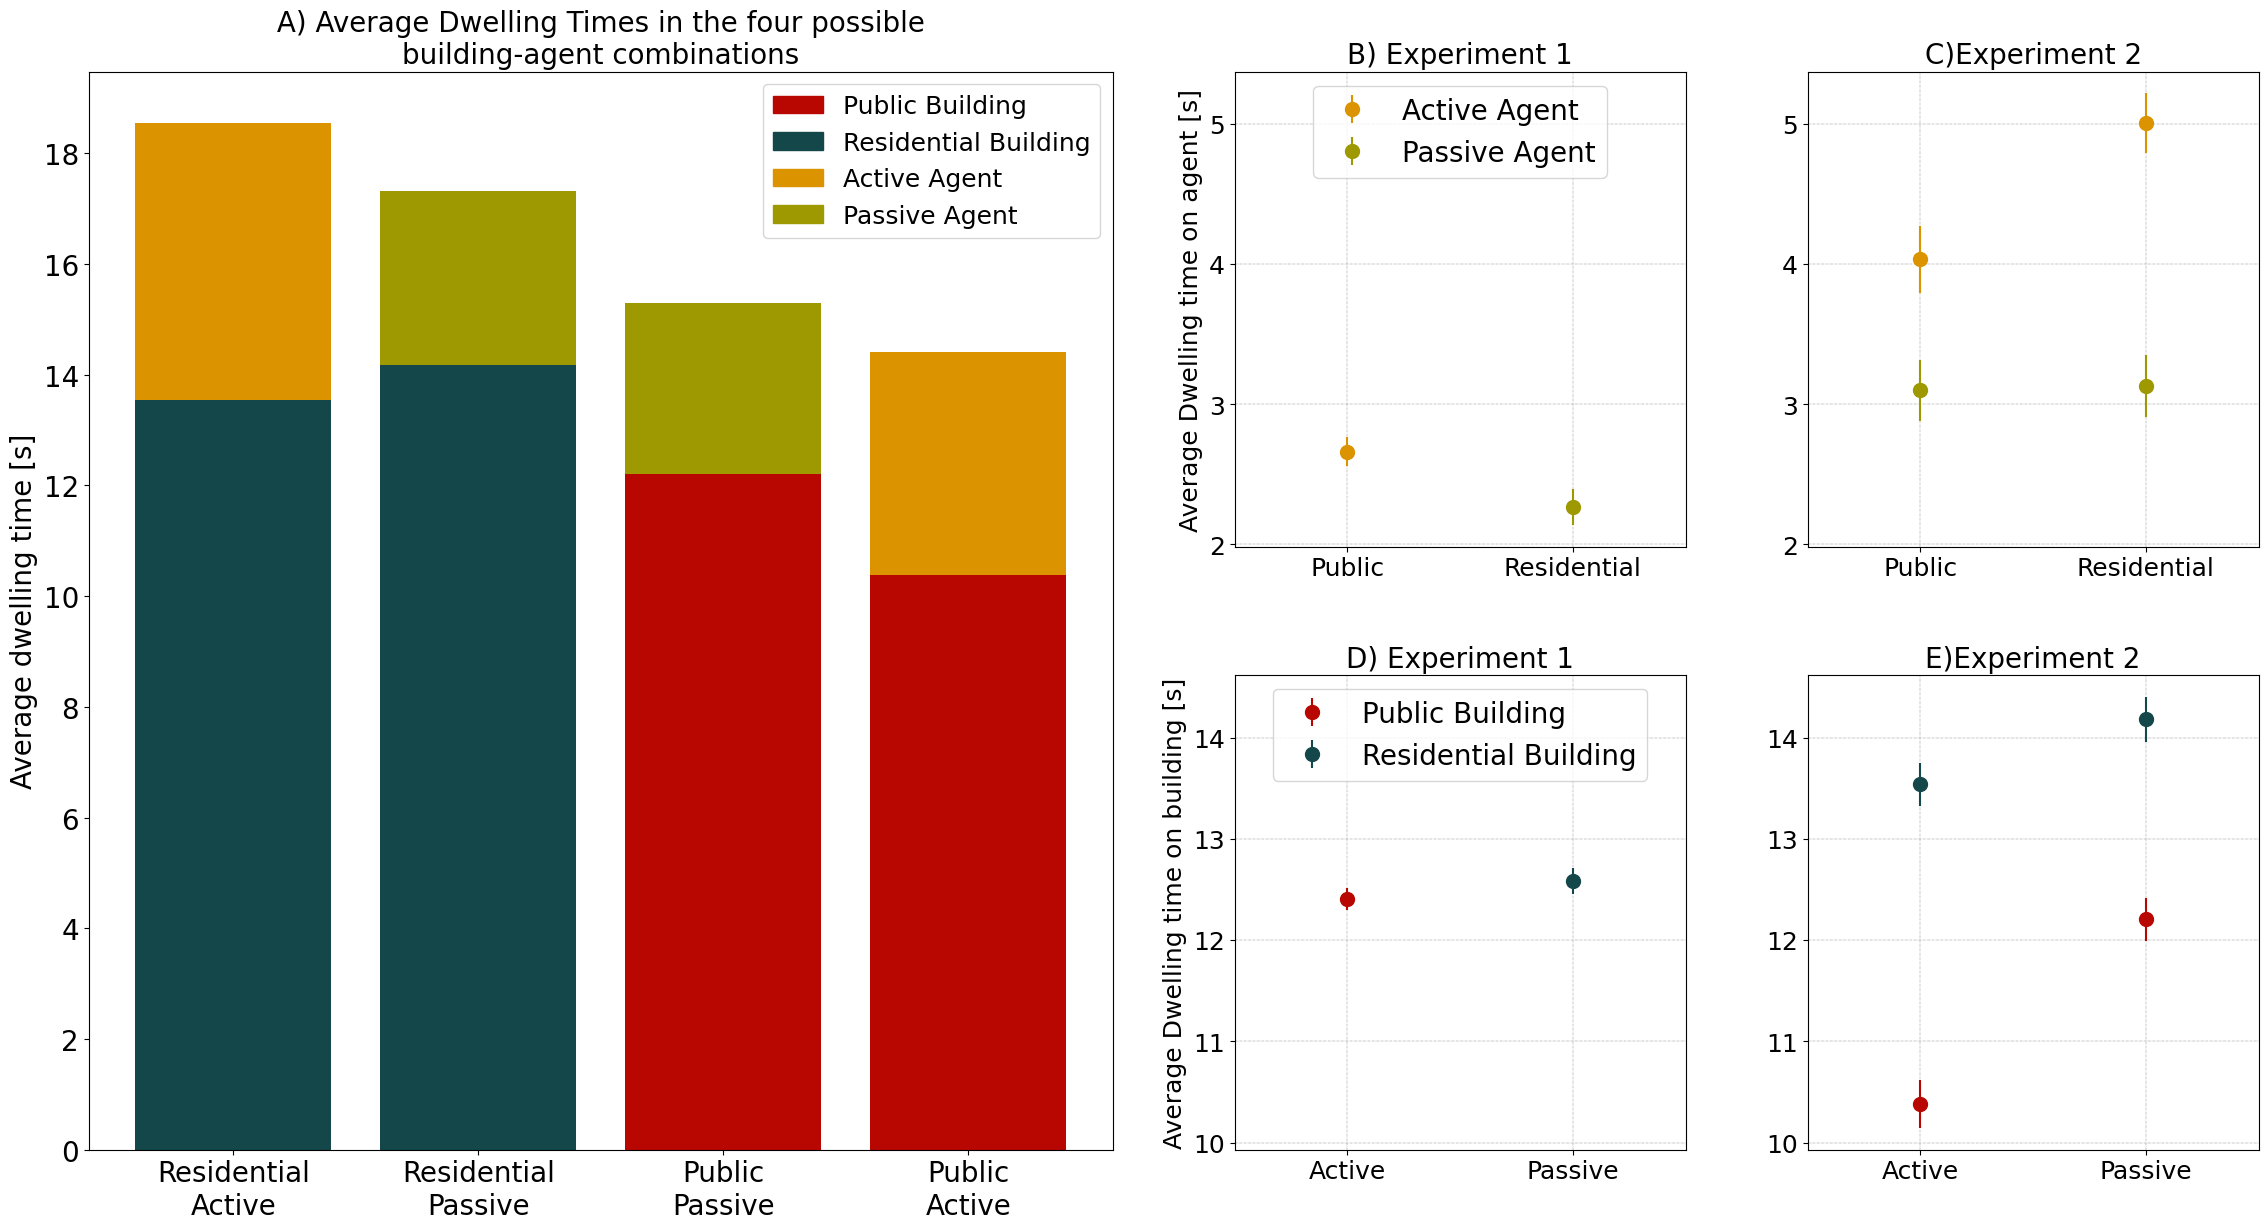

In [276]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches

# Renamed what will be the labes for plot ax0
grouped['Building_Agent'] = ["Residential\nActive", "Residential\nPassive", "Public\nPassive", "Public\nActive"]

plt.tight_layout()
# Make all locators integers

# Define the position for the bars
bar_positions = range(len(grouped))

# Create a new figure
fig = plt.figure(figsize=(28, 14))
gs = gridspec.GridSpec(2, 4) # Define the grid structure
gs.update(wspace=0.27, hspace=0.27)

ax0 = fig.add_subplot(gs[0:2,0:2]) # Add the first plot

# Plot the data with the determined colors
ax0.bar(bar_positions, grouped['Dwelling_Time_Building_Gaze'], color=bottom_colors)
ax0.bar(bar_positions, grouped['Dwelling_Time_Agent_Gaze'], bottom=grouped['Dwelling_Time_Building_Gaze'], color=top_colors)

# Set the x-ticks and their labels
ax0.set_xticks(bar_positions)
ax0.set_xticklabels(grouped['Building_Agent'], rotation=0)
ax0.yaxis.set_major_locator(loc)
ax0.tick_params(axis='both', labelsize=20)
ax0.yaxis.get_label().set_fontsize(20)

# Add labels and title
#ax0.set_xlabel('Experimental buildings')
ax0.set_ylabel('Average dwelling time [s]')
ax0.set_title(' A) Average Dwelling Times in the four possible \nbuilding-agent combinations',  fontsize=20)


# Create custom legend
legend_elements = [mpatches.Patch(color=hex_codes[0], label='Public Building'),
                   mpatches.Patch(color=hex_codes[-1], label='Residential Building'),
                   mpatches.Patch(color=hex_codes[1], label='Active Agent'),
                   mpatches.Patch(color=hex_codes[-2], label='Passive Agent')]
ax0.legend(handles=legend_elements, fontsize=18)



color_mapping = {
    'Public Building': hex_codes[0],
    'Residential Building': hex_codes[-1],
    'Active Agent': hex_codes[1],
    'Passive Agent': hex_codes[-2]
}

def configure_errorbar_plot(ax, data, title, x_col, y_col):
    for df, label in data:
        ax.errorbar(x=df[x_col], y=df[y_col],
                    yerr=df["Standard_error_building"], fmt='o', color=color_mapping[label], label=label, markersize=10, capthick=20)
    ax.set_title(title, fontsize=20)
    loc = plt.MaxNLocator(integer=True)
    ax.yaxis.set_major_locator(loc)
    ax.set_xlim((-0.5, 1.5))
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=18)
    ax.yaxis.get_label().set_fontsize(18)
    

# Add and configure subplots
ax1 = fig.add_subplot(gs[0, 2])
configure_errorbar_plot(ax1, [(Active1, 'Active Agent'), (Passive1, 'Passive Agent')], 'B) Experiment 1', "Building_Category", "Dwelling_Time_Agent_Gaze_mean")

ax2 = fig.add_subplot(gs[0, 3], sharey= ax1)
configure_errorbar_plot(ax2, [(Active2, 'Active Agent'), (Passive2, 'Passive Agent')], 'C)Experiment 2', "Building_Category", "Dwelling_Time_Agent_Gaze_mean")

ax3 = fig.add_subplot(gs[1, 2])
configure_errorbar_plot(ax3, [(Public1, 'Public Building'), (Residential1, 'Residential Building')], 'D) Experiment 1', "Agent_Category", "Dwelling_Time_Building_Gaze_mean")

ax4 = fig.add_subplot(gs[1, 3], sharey= ax3)
configure_errorbar_plot(ax4, [(Public2, 'Public Building'), (Residential2, 'Residential Building')], 'E)Experiment 2', "Agent_Category", "Dwelling_Time_Building_Gaze_mean")

axes_settings = {
    ax1: ("Average Dwelling time on agent [s]", "upper center"),
    ax3: ("Average Dwelling time on building [s]", "upper center")
}

for ax, (ylabel, legend_loc) in axes_settings.items():
    ax.set_ylabel(ylabel)
    ax.legend(loc=legend_loc, fontsize=20)

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

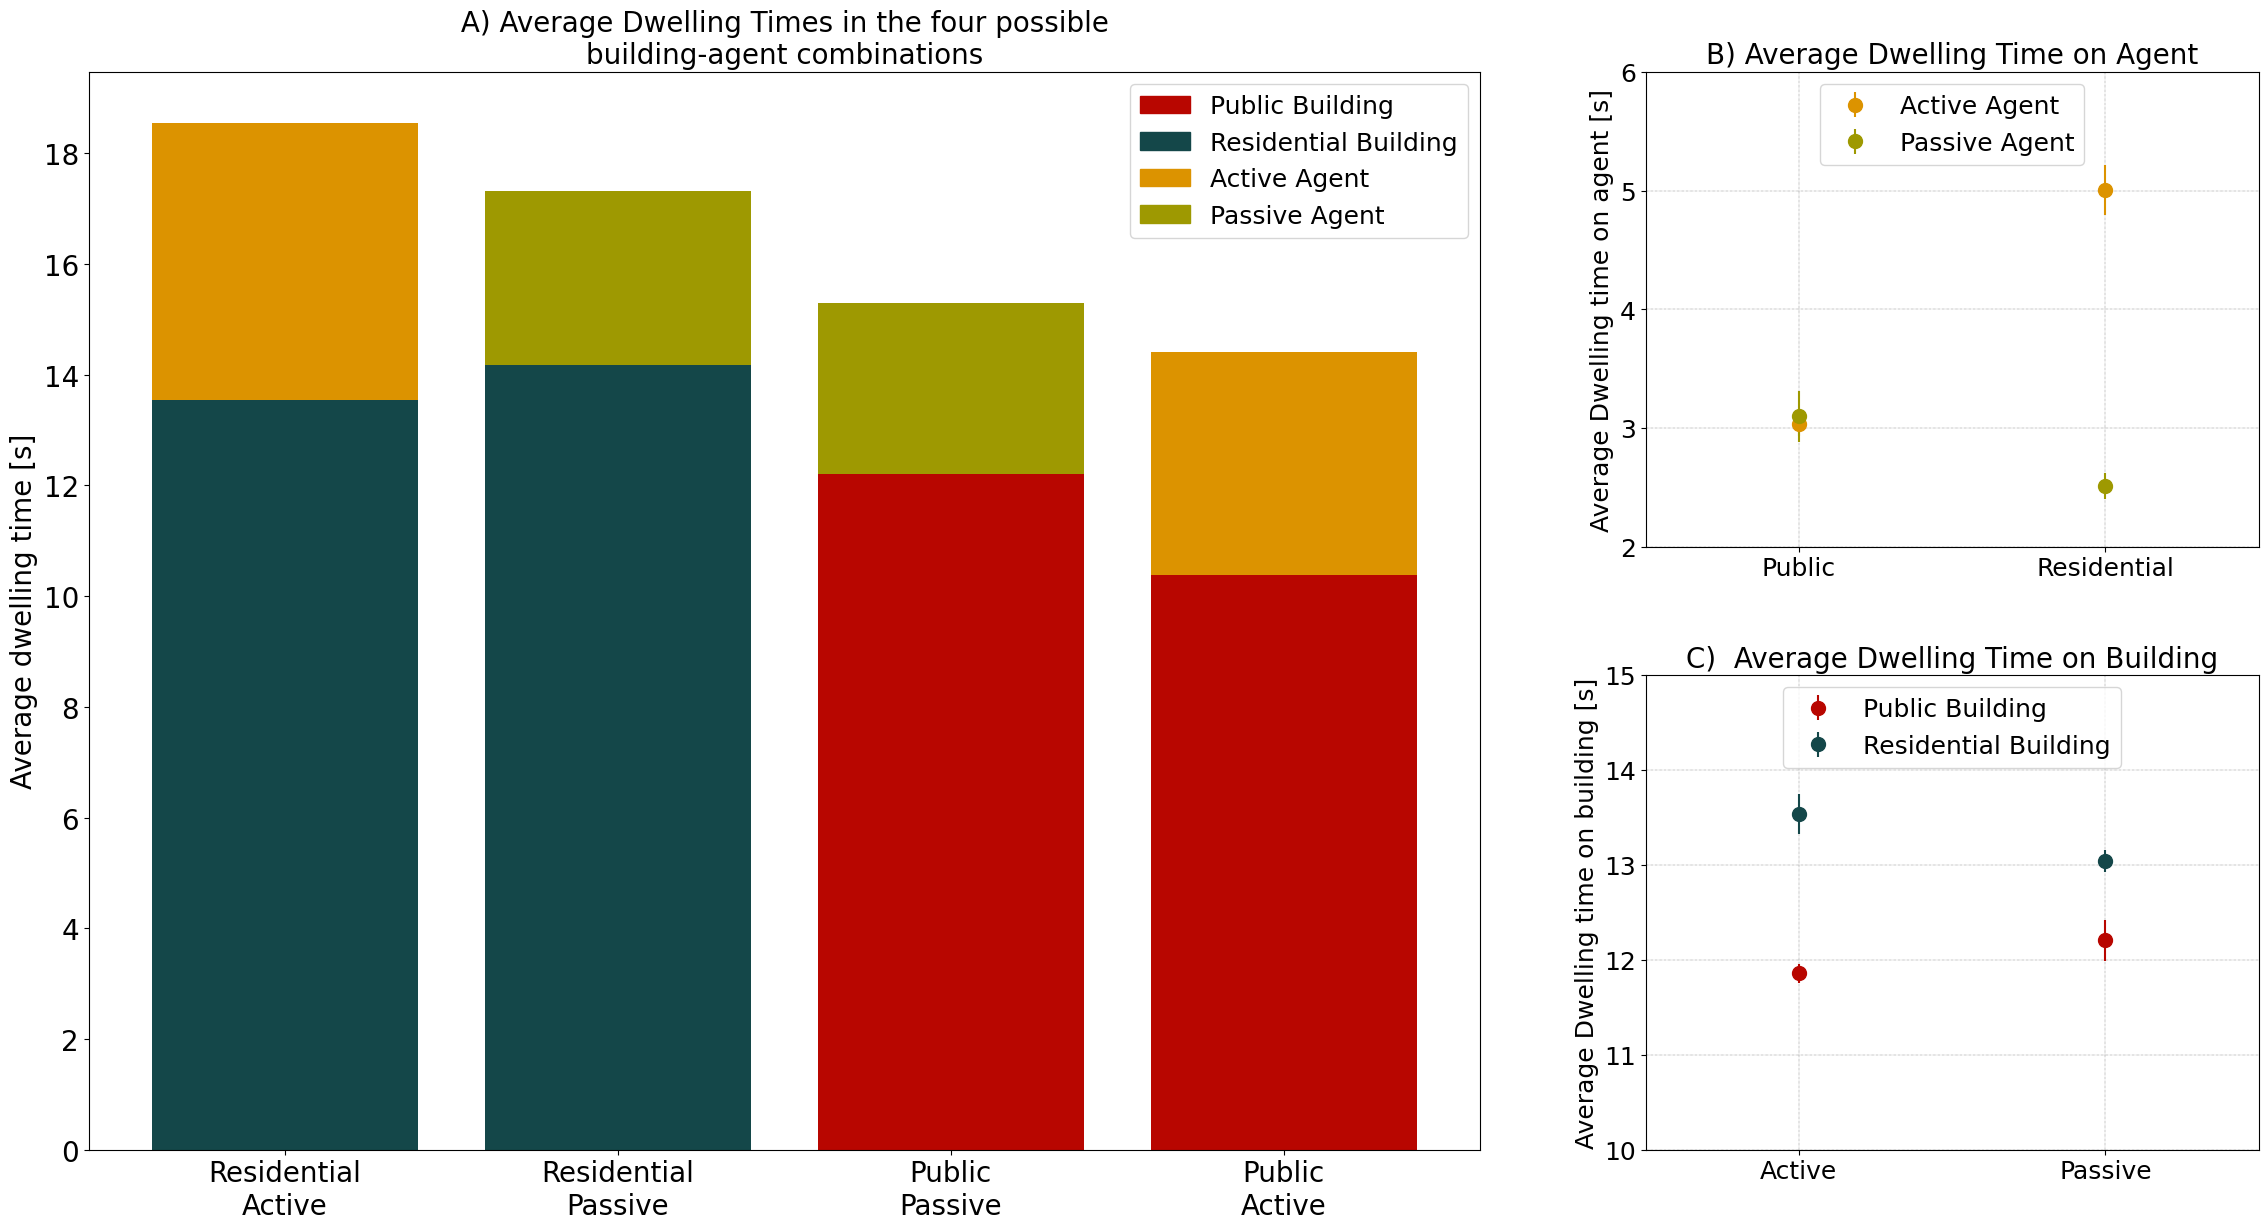

In [277]:
# Renamed what will be the labes for plot ax0
grouped['Building_Agent'] = ["Residential\nActive", "Residential\nPassive", "Public\nPassive", "Public\nActive"]

plt.tight_layout()
# Make all locators integers

# Define the position for the bars
bar_positions = range(len(grouped))

# Create a new figure
fig = plt.figure(figsize=(28, 14))
gs = gridspec.GridSpec(2, 3) # Define the grid structure
gs.update(wspace=0.27, hspace=0.27)

ax0 = fig.add_subplot(gs[0:2,0:2]) # Add the first plot

# Plot the data with the determined colors
ax0.bar(bar_positions, grouped['Dwelling_Time_Building_Gaze'], color=bottom_colors)
ax0.bar(bar_positions, grouped['Dwelling_Time_Agent_Gaze'], bottom=grouped['Dwelling_Time_Building_Gaze'], color=top_colors)

# Set the x-ticks and their labels
ax0.set_xticks(bar_positions)
ax0.set_xticklabels(grouped['Building_Agent'], rotation=0)
ax0.yaxis.set_major_locator(loc)
ax0.tick_params(axis='both', labelsize=20)
ax0.yaxis.get_label().set_fontsize(20)

# Add labels and title
#ax0.set_xlabel('Experimental buildings')
ax0.set_ylabel('Average dwelling time [s]')
ax0.set_title(' A) Average Dwelling Times in the four possible \nbuilding-agent combinations',  fontsize=20)

ax0.legend(handles=legend_elements, fontsize=18)



def configure_errorbar_plot(ax, data, title, x_col, y_col):
    for df, label in data:
        ax.errorbar(x=df[x_col], y=df[y_col],
                    yerr=df["Standard_error_building"], fmt='o', color=color_mapping[label], label=label, markersize=10, capthick=20)
    ax.set_title(title, fontsize=20)
    loc = plt.MaxNLocator(integer=True)
    ax.yaxis.set_major_locator(loc)
    ax.set_xlim((-0.5, 1.5))
    ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
    ax.tick_params(axis='both', labelsize=18)
    ax.yaxis.get_label().set_fontsize(18)
    ax.legend(loc="upper center")
    

# Add and configure subplots
ax1 = fig.add_subplot(gs[0, 2])
configure_errorbar_plot(ax1, [(Complete_Experiments_Active, 'Active Agent'), (Complete_Experiments_Passive, 'Passive Agent')], 'B) Average Dwelling Time on Agent', "Building_Category", "Dwelling_Time_Agent_Gaze_mean")
ax1.set_ylim((2,6))


ax2 = fig.add_subplot(gs[1, 2])
configure_errorbar_plot(ax2, [(Complete_Experiments_Public, 'Public Building'), (Complete_Experiments_Residential, 'Residential Building')], 'C)  Average Dwelling Time on Building', "Agent_Category", "Dwelling_Time_Building_Gaze_mean")
ax2.set_ylim((10,15))

axes_settings = {
    ax1: ("Average Dwelling time on agent [s]", "upper center"),
    ax2: ("Average Dwelling time on building [s]", "upper center")
}

for ax, (ylabel, legend_loc) in axes_settings.items():
    ax.set_ylabel(ylabel)
    ax.legend(loc=legend_loc, fontsize=18)

#plt.tight_layout()
plt.show()

In [245]:
sns.color_palette("crest", 6)

[(0.48942421, 0.72854938, 0.56751036),
 (0.34892097, 0.64828676, 0.56513633),
 (0.24929311, 0.56486397, 0.5586654),
 (0.15615526, 0.47913212, 0.54850526),
 (0.11131735, 0.39155635, 0.53422678),
 (0.14573579, 0.29354139, 0.49847009)]

In [243]:
sns.color_palette("icefire", 6)

[(0.33355526, 0.64107876, 0.80445484),
 (0.28708711, 0.32912157, 0.69034504),
 (0.15652427, 0.15348248, 0.22238175),
 (0.22994394, 0.13076731, 0.15146314),
 (0.61319563, 0.1824336, 0.2687872),
 (0.91463791, 0.43668557, 0.21367954)]

In [250]:
sns.color_palette("Spectral", 6)

[(0.8853517877739331, 0.3190311418685121, 0.29042675893886966),
 (0.9873125720876587, 0.6473663975394078, 0.3642445213379469),
 (0.9971549404075356, 0.9118031526336025, 0.6010765090349866),
 (0.9288735101883892, 0.9715494040753557, 0.6380622837370243),
 (0.6334486735870821, 0.8521337946943485, 0.6436755094194541),
 (0.2800461361014994, 0.6269896193771626, 0.7024221453287197)]

In [150]:
Active1

,Agent_Category,Building_Category,Size,Dwelling_Time_Agent_Gaze_mean,Dwelling_Time_Agent_Gaze_median,Dwelling_Time_Agent_Gaze_std,Dwelling_Time_Building_Gaze_size,Dwelling_Time_Building_Gaze_mean,Dwelling_Time_Building_Gaze_median,Dwelling_Time_Building_Gaze_std,Standard_error_building,Standard_error_agent
0,Active,Public,5011,2.662227,2.010781,2.522774,5011,12.407331,11.187102,7.489482,0.105801,0.035638


In [110]:
bar_positions

range(0, 4)

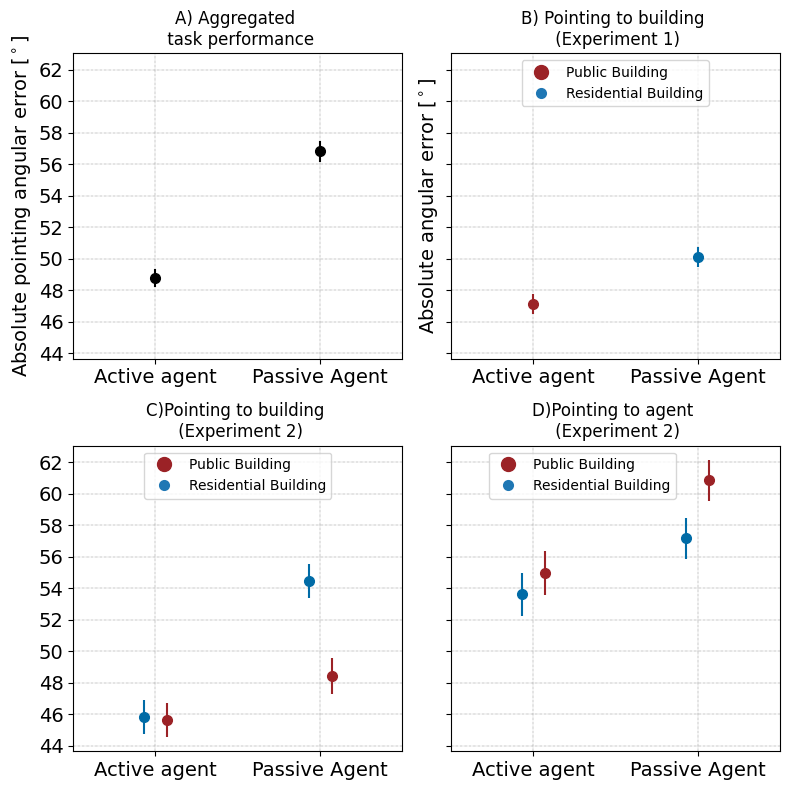

In [108]:
plt.style.use('default')
fig, axes = plt.subplots(2, 2, sharey=True,  figsize=(8, 8))


# Common properties
colors = ['#9b2226', '#006ba6']
labels = ["Public Building", "Residential Building"]
x_positions = [0, 1]
offset = 0.07


axes[0,0].errorbar(x= SecondExp.iloc[1,0], y= SecondExp.iloc[1,3],yerr= SecondExp.iloc[1,6], color='#000000', markersize=7, capthick=20, fmt='o')
axes[0,0].errorbar(x= SecondExp.iloc[0,0], y= SecondExp.iloc[0,3],yerr= SecondExp.iloc[0,6], color='#000000', markersize=7, capthick=20, fmt='o')
axes[0,0].set_title('A) Aggregated \n task performance')
axes[0,0].set_ylabel("Absolute pointing angular error [$^\circ$]")


# Plotting for Experiment 1
ax = axes[0,1]
ax.errorbar(x=Public1p["Agent_Category"], y=Public1p["AbsolutError_mean"].values, yerr=Public1p.Standard_error_performance,
            fmt='o', color=colors[0], label=labels[0], markersize=7, capthick=20)
ax.errorbar(x=Residential1p["Agent_Category"], y=Residential1p["AbsolutError_mean"].values, yerr=Residential1p.Standard_error_performance,
            fmt='o--', color=colors[1], label=labels[1], markersize=7, capthick=20)
ax.set_title('B) Pointing to building \n (Experiment 1)')
ax.legend(handles, labels, loc='upper center', ncol=1, bbox_to_anchor=(0.5, 1), fontsize=10)
ax.set_ylabel("Absolute angular error [$^\circ$]")

# Plotting for Experiment 2 (Building)
ax = axes[1,0]
ax.errorbar(x=np.array(x_positions) + offset, y=Public2p["AbsolutError_mean"].values, yerr=Public2p.Standard_error_performance,
            fmt='o', color=colors[0], label=labels[0], markersize=7, capthick=20)
ax.errorbar(x=np.array(x_positions) - offset, y=Residential2p["AbsolutError_mean"].values, yerr=Residential2p.Standard_error_performance,
            fmt='o', color=colors[1], label=labels[1], markersize=7, capthick=20)
ax.set_title('C)Pointing to building \n (Experiment 2)')
ax.legend(handles, labels, loc='upper center', ncol=1, bbox_to_anchor=(0.5, 1), fontsize=10)

# Plotting for Experiment 2 (Agent)
ax = axes[1,1]
ax.errorbar(x=np.array(x_positions) + offset, y=Public2a["AbsolutError_mean"].values, yerr=Public2a.Standard_error_performance,
            fmt='o', color=colors[0], label=labels[0], markersize=7, capthick=20)
ax.errorbar(x=np.array(x_positions) - offset, y=Residential2a["AbsolutError_mean"].values, yerr=Residential2a.Standard_error_performance,
            fmt='o', color=colors[1], label=labels[1], markersize=7, capthick=20)
ax.set_title('D)Pointing to agent \n (Experiment 2)')
ax.legend(handles, labels, loc='upper center', ncol=1, bbox_to_anchor=(0.4, 1), fontsize=10)

# Set common properties for all subplots
for row in axes:
    for ax in row:
        ax.set_xlim((-0.5, 1.5))
        ax.xaxis.set_major_locator(matplotlib.ticker.FixedLocator([0, 1]))
        ax.grid(True, color="grey", linewidth="0.3", linestyle="-.")
        ax.tick_params(axis='both', labelsize=14)
        ax.set_xticklabels(["Active agent", "Passive Agent"], multialignment="right")
        ax.yaxis.get_label().set_fontsize(14)
        ax.yaxis.set_major_locator(MaxNLocator(integer=True))

fig.tight_layout()
plt.savefig("/Users/tracysanchezpacheco/Desktop/Absolut_Error_OneStandard_3plots.png", bbox_inches="tight",
            pad_inches=0.02, transparent=True)


In [71]:
grouped.head()

,Agent_Category,Building_Category,Unnamed: 0,Unnamed: 0.1,SubjectID,AbsolutError,SignedAngle-+180,IQR,RT,DistanceToParticipant,...,StartPointID,ID_for_StartingPosition,avatar_ID,Context,Dwelling_Time_Building_Gaze,Fixation_Count_Building_Gaze,Dwelling_Time_Agent_Gaze,Fixation_Count_Agent_Gaze,Building_Agent,Total_Dwelling_Time
1,Active,Residential,3235.351552,3235.351552,5028.757085,45.849850,-3.920949,55.228866,8.973705,278.847627,...,14.153171,4.481107,20.319838,False,13.539849,69.576056,5.002839,24.964085,Residential location \nActive Agent,18.542688
3,Passive,Residential,3228.235094,3228.235094,4993.234526,54.471034,-6.132850,54.899786,8.545156,299.393027,...,15.143668,4.535491,49.412834,False,14.182581,73.373633,3.128689,15.045565,Residential location \nPassive Agent,17.311270
2,Passive,Public,3215.185386,3215.185386,5010.395531,48.439834,-3.610013,55.039483,9.250494,298.857361,...,14.361111,4.492150,35.439010,True,12.205128,63.983808,3.097557,14.949482,Public location \nPassive Agent,15.302685
0,Active,Public,3301.536769,3301.536769,4997.225644,45.625846,-6.200894,55.132128,9.120443,299.447863,...,14.253928,4.494029,8.765556,True,10.381891,51.913043,4.032635,19.799736,Public location \nActive Agent,14.414526
